# Data mining for HeartBit dataset
---
### Steps
1. Exploratory Data Analysis
    1.1. Understanding the problem
    1.2. Getting to know the data
    1.3. Prepare the data for training
2. Training the model
3. Evaluating the model
4. Improving the model
5. Presenting the solution

## 1. Exploratory Data Analysis
### 1.1. Understanding the problem
The goal of this project is to predict the NYHA class of a patient based on the patient's data. The NYHA (New York Heart Association) class is the functional classification system for the patient with heart failure in stage C or D. The classification is related to the patient symptoms and physical activity.

The NYHA class is divided into four classes:
- Class I: No limitation of physical activity. Ordinary physical activity does not cause undue fatigue, palpitation or shortness of breath.
- Class II: Slight limitation of physical activity. Comfortable at rest. Ordinary physical activity results in fatigue, palpitation or shortness of breath.
- Class III: Marked limitation of physical activity. Comfortable at rest. Less than ordinary activity causes fatigue, palpitation or shortness of breath.
- Class IV: Unable to carry out any physical activity without discomfort. Symptoms of heart failure at rest. If any physical activity is undertaken, discomfort is increased.

### 1.2. Getting to know the data
For this project, I will be using the HeartBit dataset. The dataset contains values of 63 variables recorded for 469 patients.
The variables can be grouped into following groups:
- Clinical
- Technical
- Demographic
- Anthropometry (pomiary antropometryczne - np. wzrost, waga)
- Comorbidities (choroby współistniejące)
- Treatment
- Biochemistry
- Fitness Level

---
NOTES:
- Sprawdzić dominujące wartości w kolumnach
- Zapoznanie się z działaniem drzewa decyzyjnego z wykorzystaniem biblioteki scikit-learn (https://scikit-learn.org/stable/modules/tree.html)
- Zamiana atrybutów nominalnych na numeryczne (https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features)
- Redukcja wielowymiarowości (https://scikit-learn.org/stable/modules/decomposition.html#decompositions)
- Wyważanie klas ze względu na niezbalansowane dane, aby zapobiec tendencyjności modelu w kierunku klasy dominującej
- przycinanie drzewa decyzyjnego
- scikit-learn wykorzystuje zoptymalizowaną wersję algorytmu CART (Classification and Regression Trees) i nie obsługuje obecnie zmiennych kategorycznych

## Imports

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# Load the dataset from csv file
df = pd.read_excel("data/heartbit.xlsx", header=1)
# dataset size before cleaning
size_before = df.shape[0]
# Print number of rows and columns
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Number of rows: 469
Number of columns: 64


In [55]:
df["NYHA"].unique()

array([2. , 1. , 3. , 4. , 1.5, 2.5, 3.5, nan])

In [56]:
# Convert NYHA class 1.5, 2.5, 3.5 to 1, 2, 4
df["NYHA"] = df["NYHA"].replace([1.5, 2.5, 3.5], [1, 2, 4])

In [57]:
# Check how many missing values are in each column
df.isnull().sum()

ID CODES       0
DEATH?        88
DEATHDATE     86
TIMEFU       116
QOL          218
            ... 
SLOPE         61
METS         208
WEBER         60
PEAK>18       60
SLOPE>35      94
Length: 64, dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID CODES          469 non-null    object        
 1   DEATH?            381 non-null    float64       
 2   DEATHDATE         383 non-null    datetime64[ns]
 3   TIMEFU            353 non-null    object        
 4   QOL               251 non-null    float64       
 5   OQLsub1           228 non-null    float64       
 6   OQLsub2           228 non-null    float64       
 7   DOB               456 non-null    datetime64[ns]
 8   DOE               469 non-null    datetime64[ns]
 9   AGE               456 non-null    float64       
 10  HEIGHT.CM         460 non-null    float64       
 11  WEIGHT.KG         460 non-null    float64       
 12  BMI               460 non-null    float64       
 13  LVEF.0            456 non-null    float64       
 14  NYHA              460 non-

In [59]:
df = df.dropna()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 156 entries, 0 to 461
Data columns (total 64 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID CODES          156 non-null    object        
 1   DEATH?            156 non-null    float64       
 2   DEATHDATE         156 non-null    datetime64[ns]
 3   TIMEFU            156 non-null    object        
 4   QOL               156 non-null    float64       
 5   OQLsub1           156 non-null    float64       
 6   OQLsub2           156 non-null    float64       
 7   DOB               156 non-null    datetime64[ns]
 8   DOE               156 non-null    datetime64[ns]
 9   AGE               156 non-null    float64       
 10  HEIGHT.CM         156 non-null    float64       
 11  WEIGHT.KG         156 non-null    float64       
 12  BMI               156 non-null    float64       
 13  LVEF.0            156 non-null    float64       
 14  NYHA              156 non-null 

In [61]:
df.head()

ID CODES   DEATH?  DEATHDATE TIMEFU   QOL  OQLsub1  OQLsub2        DOB  \
0       HB1     0.0 2012-02-03   2076  27.0     23.0      4.0 1959-06-14   
1       HB2     0.0 2012-08-12   2316  42.0     37.0      5.0 1958-12-22   
2       HB3     0.0 2012-02-21   2349   0.0      0.0      0.0 1945-11-25   
3       HB4     0.0 2013-02-03   2459  10.0      7.0      3.0 1945-03-20   
4       HB5     0.0 2013-02-03   2629   4.0      2.0      2.0 1982-03-07   

         DOE        AGE  ...  EXERCISE5  CPX.TIME  CPX.PEAKVO2  \
0 2006-05-29  46.989041  ...      -10.0    14.523       2577.8   
1 2006-04-10  47.331507  ...      -13.0    17.267       1555.8   
2 2005-09-16  59.849315  ...      -22.0    15.195       1748.6   
3 2006-05-12  61.186301  ...      -38.0    13.450       1799.8   
4 2005-11-23  23.731507  ...        4.0    16.380       2626.4   

   CPX.PEAKVO2FORBM   RER      SLOPE      METS  WEBER  PEAK>18  SLOPE>35  
0             23.98  1.04  37.485389  6.851429    1.0      1.0       1.0  
1             22.22  1.00  37.232158  6.348571    1.0      1.0       1.0  
2             21.86  1.17  44.719476  6.245714    1.0      1.0       1.0  
3             20.58  1.16  39.423029  5.880000    1.0      1.0       1.0  
4             26.54  1.21  21.051193  7.582857    1.0      1.0       0.0  

[5 rows x 64 columns]

In [62]:
df["NYHA"].unique()

array([2., 1., 3., 4.])

In [63]:
df["MR"].unique()

array([0.5, 1. , 2. , 0. , 3. , 2.5, 3.5, 1.5])

In [64]:
# Remove all columns with datetime64 data type
df = df.select_dtypes(exclude=["datetime64"])
df.head()

ID CODES   DEATH? TIMEFU   QOL  OQLsub1  OQLsub2        AGE  HEIGHT.CM  \
0       HB1     0.0   2076  27.0     23.0      4.0  46.989041      170.0   
1       HB2     0.0   2316  42.0     37.0      5.0  47.331507      165.0   
2       HB3     0.0   2349   0.0      0.0      0.0  59.849315      177.0   
3       HB4     0.0   2459  10.0      7.0      3.0  61.186301      173.0   
4       HB5     0.0   2629   4.0      2.0      2.0  23.731507      180.0   

   WEIGHT.KG        BMI  ...  EXERCISE5  CPX.TIME  CPX.PEAKVO2  \
0      116.0  40.138408  ...      -10.0    14.523       2577.8   
1       70.0  25.711662  ...      -13.0    17.267       1555.8   
2       80.0  25.535446  ...      -22.0    15.195       1748.6   
3       87.5  29.235858  ...      -38.0    13.450       1799.8   
4       99.0  30.555556  ...        4.0    16.380       2626.4   

   CPX.PEAKVO2FORBM   RER      SLOPE      METS  WEBER  PEAK>18  SLOPE>35  
0             23.98  1.04  37.485389  6.851429    1.0      1.0       1.0  
1             22.22  1.00  37.232158  6.348571    1.0      1.0       1.0  
2             21.86  1.17  44.719476  6.245714    1.0      1.0       1.0  
3             20.58  1.16  39.423029  5.880000    1.0      1.0       1.0  
4             26.54  1.21  21.051193  7.582857    1.0      1.0       0.0  

[5 rows x 61 columns]

In [65]:
df["6MWT.FATIGUE"].unique()

array([ 9.,  8.,  0.,  3.,  5.,  4.,  7.,  6., 10.,  2.,  1.])

In [66]:
df["6MWT.DYSPN"].unique()

array([ 0.,  5.,  3.,  7.,  6.,  2.,  8.,  9.,  1.,  4., 10.])

In [67]:
df["WEBER"].unique()

array([1., 2., 3., 4.])

In [68]:
# Round age to integer
df["AGE"] = df["AGE"].round()

In [69]:
df.head()

ID CODES   DEATH? TIMEFU   QOL  OQLsub1  OQLsub2   AGE  HEIGHT.CM  \
0       HB1     0.0   2076  27.0     23.0      4.0  47.0      170.0   
1       HB2     0.0   2316  42.0     37.0      5.0  47.0      165.0   
2       HB3     0.0   2349   0.0      0.0      0.0  60.0      177.0   
3       HB4     0.0   2459  10.0      7.0      3.0  61.0      173.0   
4       HB5     0.0   2629   4.0      2.0      2.0  24.0      180.0   

   WEIGHT.KG        BMI  ...  EXERCISE5  CPX.TIME  CPX.PEAKVO2  \
0      116.0  40.138408  ...      -10.0    14.523       2577.8   
1       70.0  25.711662  ...      -13.0    17.267       1555.8   
2       80.0  25.535446  ...      -22.0    15.195       1748.6   
3       87.5  29.235858  ...      -38.0    13.450       1799.8   
4       99.0  30.555556  ...        4.0    16.380       2626.4   

   CPX.PEAKVO2FORBM   RER      SLOPE      METS  WEBER  PEAK>18  SLOPE>35  
0             23.98  1.04  37.485389  6.851429    1.0      1.0       1.0  
1             22.22  1.00  37.232158  6.348571    1.0      1.0       1.0  
2             21.86  1.17  44.719476  6.245714    1.0      1.0       1.0  
3             20.58  1.16  39.423029  5.880000    1.0      1.0       1.0  
4             26.54  1.21  21.051193  7.582857    1.0      1.0       0.0  

[5 rows x 61 columns]

156


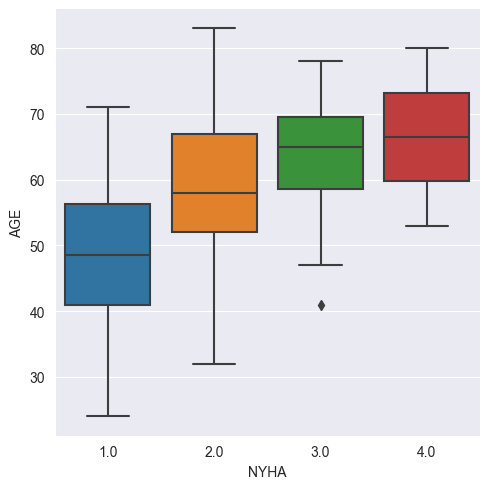

In [70]:
print(len(df))
sns.catplot(x="NYHA", y="AGE", data=df, kind="box")

In [71]:
# Remove all categorical columns (NYHA, MR, WEBER, 6MWT.FATIGUE, 6MWT.DYSPN)
df = df.drop(["MR", "WEBER", "6MWT.FATIGUE", "6MWT.DYSPN"], axis=1)
df.columns
# Remove "ID CODES " column
df = df.drop("ID CODES ", axis=1)
#

In [72]:
# Get all columns with object data type
obj_cols = df.select_dtypes(include=["object"]).columns
print(obj_cols)
# Check type for all elements in each column
for col in obj_cols:
    print(df[col].apply(type).value_counts())
# Remove all elements with type "str" from TIMEFU column
df["TIMEFU"] = df["TIMEFU"].apply(lambda x: np.nan if type(x) == str else x)
print(df["TIMEFU"].apply(type).value_counts())
# Check if there nan values in TIMEFU column
print(f"Number of nan values in TIMEFU column: {df['TIMEFU'].isnull().sum()}")
# Remove all nan values from TIMEFU column
df = df.dropna()

# Convert all float values to int in BNP column
df["BNP"] = df["BNP"].apply(lambda x: int(x) if type(x) == float else x)
obj_cols = df.select_dtypes(include=["object"]).columns
print(obj_cols)

Index(['TIMEFU', 'BNP'], dtype='object')
TIMEFU
<class 'int'>    154
<class 'str'>      2
Name: count, dtype: int64
BNP
<class 'int'>      92
<class 'float'>    64
Name: count, dtype: int64
TIMEFU
<class 'float'>    156
Name: count, dtype: int64
Number of nan values in TIMEFU column: 2
Index([], dtype='object')


In [73]:
# sns.pairplot(df.iloc[:, :], hue="NYHA")
# plt.savefig("plots/pairplot.png")

In [74]:
X = df.drop("NYHA", axis=1)

In [75]:
y = df["NYHA"]

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
# Print the ratio of lost data to the whole dataset
print(f"Number of rows in the dataset: {size_before}")
print(f"Number of rows in the dataset after removing rows with nan values: {X.shape[0]}")
print(f"Number of rows lost: {size_before - X.shape[0]}")
print(f"Ratio of lost data to the whole dataset: {(size_before - X.shape[0]) /size_before * 100:.2f}%")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
X_train.head()

Number of rows in the dataset: 469
Number of rows in the dataset after removing rows with nan values: 154
Number of rows lost: 315
Ratio of lost data to the whole dataset: 67.16%


DEATH?  TIMEFU   QOL  OQLsub1  OQLsub2   AGE  HEIGHT.CM  WEIGHT.KG  \
190     0.0  2796.0   0.0      0.0      0.0  57.0      178.0     95.409   
230     1.0   523.0  45.0     41.0      4.0  58.0      170.0     87.956   
59      1.0   590.0  61.0     60.0      1.0  63.0      174.0    100.000   
26      1.0   152.0   4.0      4.0      0.0  65.0      161.0     68.200   
27      0.0  2530.0  45.0     35.0     10.0  66.0      176.0     89.800   

           BMI  LVEF.0  ...  EXERCISE4  EXERCISE5  CPX.TIME  CPX.PEAKVO2  \
190  30.112675    45.0  ...        1.0      -16.0    13.149       2257.6   
230  30.434602    40.0  ...       -8.0       -9.0    10.413       1205.8   
59   33.029462    25.0  ...       -9.0      -14.0     4.009        604.4   
26   26.310713    35.0  ...      -12.0       -8.0    10.846       1222.6   
27   28.990186    30.0  ...       -2.0       -8.0    12.600       1608.0   

     CPX.PEAKVO2FORBM   RER      SLOPE      METS  PEAK>18  SLOPE>35  
190             23.62  1.26  24.624578  6.748571      1.0       0.0  
230             13.38  1.36  44.580605  3.822857      0.0       1.0  
59               5.96  1.17  58.981488  1.702857      0.0       1.0  
26              17.98  1.27  40.945405  5.137143      1.0       1.0  
27              17.90  1.18  26.907800  5.114286      1.0       0.0  

[5 rows x 55 columns]

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
model = DecisionTreeClassifier()

In [80]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
base_preds = model.predict(X_test)

In [82]:
from sklearn.metrics import classification_report, confusion_matrix

In [83]:
print(classification_report(y_test, base_preds))

              precision    recall  f1-score   support

         1.0       0.60      0.75      0.67         4
         2.0       0.76      0.54      0.63        24
         3.0       0.60      0.83      0.70        18
         4.0       0.00      0.00      0.00         1

    accuracy                           0.66        47
   macro avg       0.49      0.53      0.50        47
weighted avg       0.67      0.66      0.65        47



C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
confusion_matrix(y_test, base_preds)

array([[ 3,  1,  0,  0],
       [ 2, 13,  9,  0],
       [ 0,  3, 15,  0],
       [ 0,  0,  1,  0]], dtype=int64)

In [85]:
model.feature_importances_ # Check which features are the most important for the model to make a decision

array([0.        , 0.        , 0.        , 0.        , 0.07831911,
       0.10021329, 0.        , 0.        , 0.02494364, 0.05048997,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.05055107, 0.01303305, 0.06008924, 0.        ,
       0.        , 0.034469  , 0.        , 0.        , 0.02160743,
       0.01920661, 0.01440495, 0.        , 0.04235862, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.09718125, 0.05556197, 0.22651659, 0.        , 0.        ,
       0.        , 0.        , 0.11105421, 0.        , 0.        ])

In [86]:
X.columns

Index(['DEATH?', 'TIMEFU', 'QOL', 'OQLsub1', 'OQLsub2', 'AGE', 'HEIGHT.CM',
       'WEIGHT.KG', 'BMI', 'LVEF.0', 'PM', 'AETH.HF', 'MI', 'AF', 'DM', 'HT',
       'COPD', 'STROKE', 'KIDNEY.DIS', 'ACEI.ARB', 'BB', 'MRA', 'DIUR',
       'ANTIPLAT', 'STATIN', 'DIGOX', 'HB', 'NA', 'K', 'BNP', 'CRP', 'LVEDD',
       'REST.SBP', 'REST.DBP', 'REST.HR', 'EXERCISE1', 'EXERCISE2',
       'EXERCISE3', '6MWT.DIST', '6MWT.SBP1', '6MWT.DBP1', '6MWT.HR1',
       '6MWT.SBP2', '6MWT.DBP2', '6MWT.HR2', 'EXERCISE4', 'EXERCISE5',
       'CPX.TIME', 'CPX.PEAKVO2', 'CPX.PEAKVO2FORBM', 'RER', 'SLOPE', 'METS',
       'PEAK>18', 'SLOPE>35'],
      dtype='object')

In [87]:
pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=["Feature Importance"]).sort_values(by="Feature Importance", ascending=False)

Feature Importance
CPX.TIME                    0.226517
METS                        0.111054
AGE                         0.100213
EXERCISE4                   0.097181
OQLsub2                     0.078319
K                           0.060089
EXERCISE5                   0.055562
HB                          0.050551
LVEF.0                      0.050490
6MWT.DIST                   0.042359
LVEDD                       0.034469
BMI                         0.024944
REST.HR                     0.021607
EXERCISE1                   0.019207
EXERCISE2                   0.014405
NA                          0.013033
6MWT.SBP1                   0.000000
REST.DBP                    0.000000
EXERCISE3                   0.000000
6MWT.HR2                    0.000000
6MWT.DBP1                   0.000000
6MWT.HR1                    0.000000
6MWT.SBP2                   0.000000
6MWT.DBP2                   0.000000
CPX.PEAKVO2                 0.000000
CPX.PEAKVO2FORBM            0.000000
RER                         0.000000
SLOPE                       0.000000
PEAK>18                     0.000000
REST.SBP                    0.000000
DEATH?                      0.000000
CRP                         0.000000
BNP                         0.000000
QOL                         0.000000
OQLsub1                     0.000000
HEIGHT.CM                   0.000000
WEIGHT.KG                   0.000000
PM                          0.000000
AETH.HF                     0.000000
MI                          0.000000
AF                          0.000000
DM                          0.000000
HT                          0.000000
COPD                        0.000000
STROKE                      0.000000
KIDNEY.DIS                  0.000000
ACEI.ARB                    0.000000
BB                          0.000000
MRA                         0.000000
DIUR                        0.000000
ANTIPLAT                    0.000000
STATIN                      0.000000
DIGOX                       0.000000
TIMEFU                      0.000000
SLOPE>35                    0.000000

In [88]:
from sklearn.tree import plot_tree

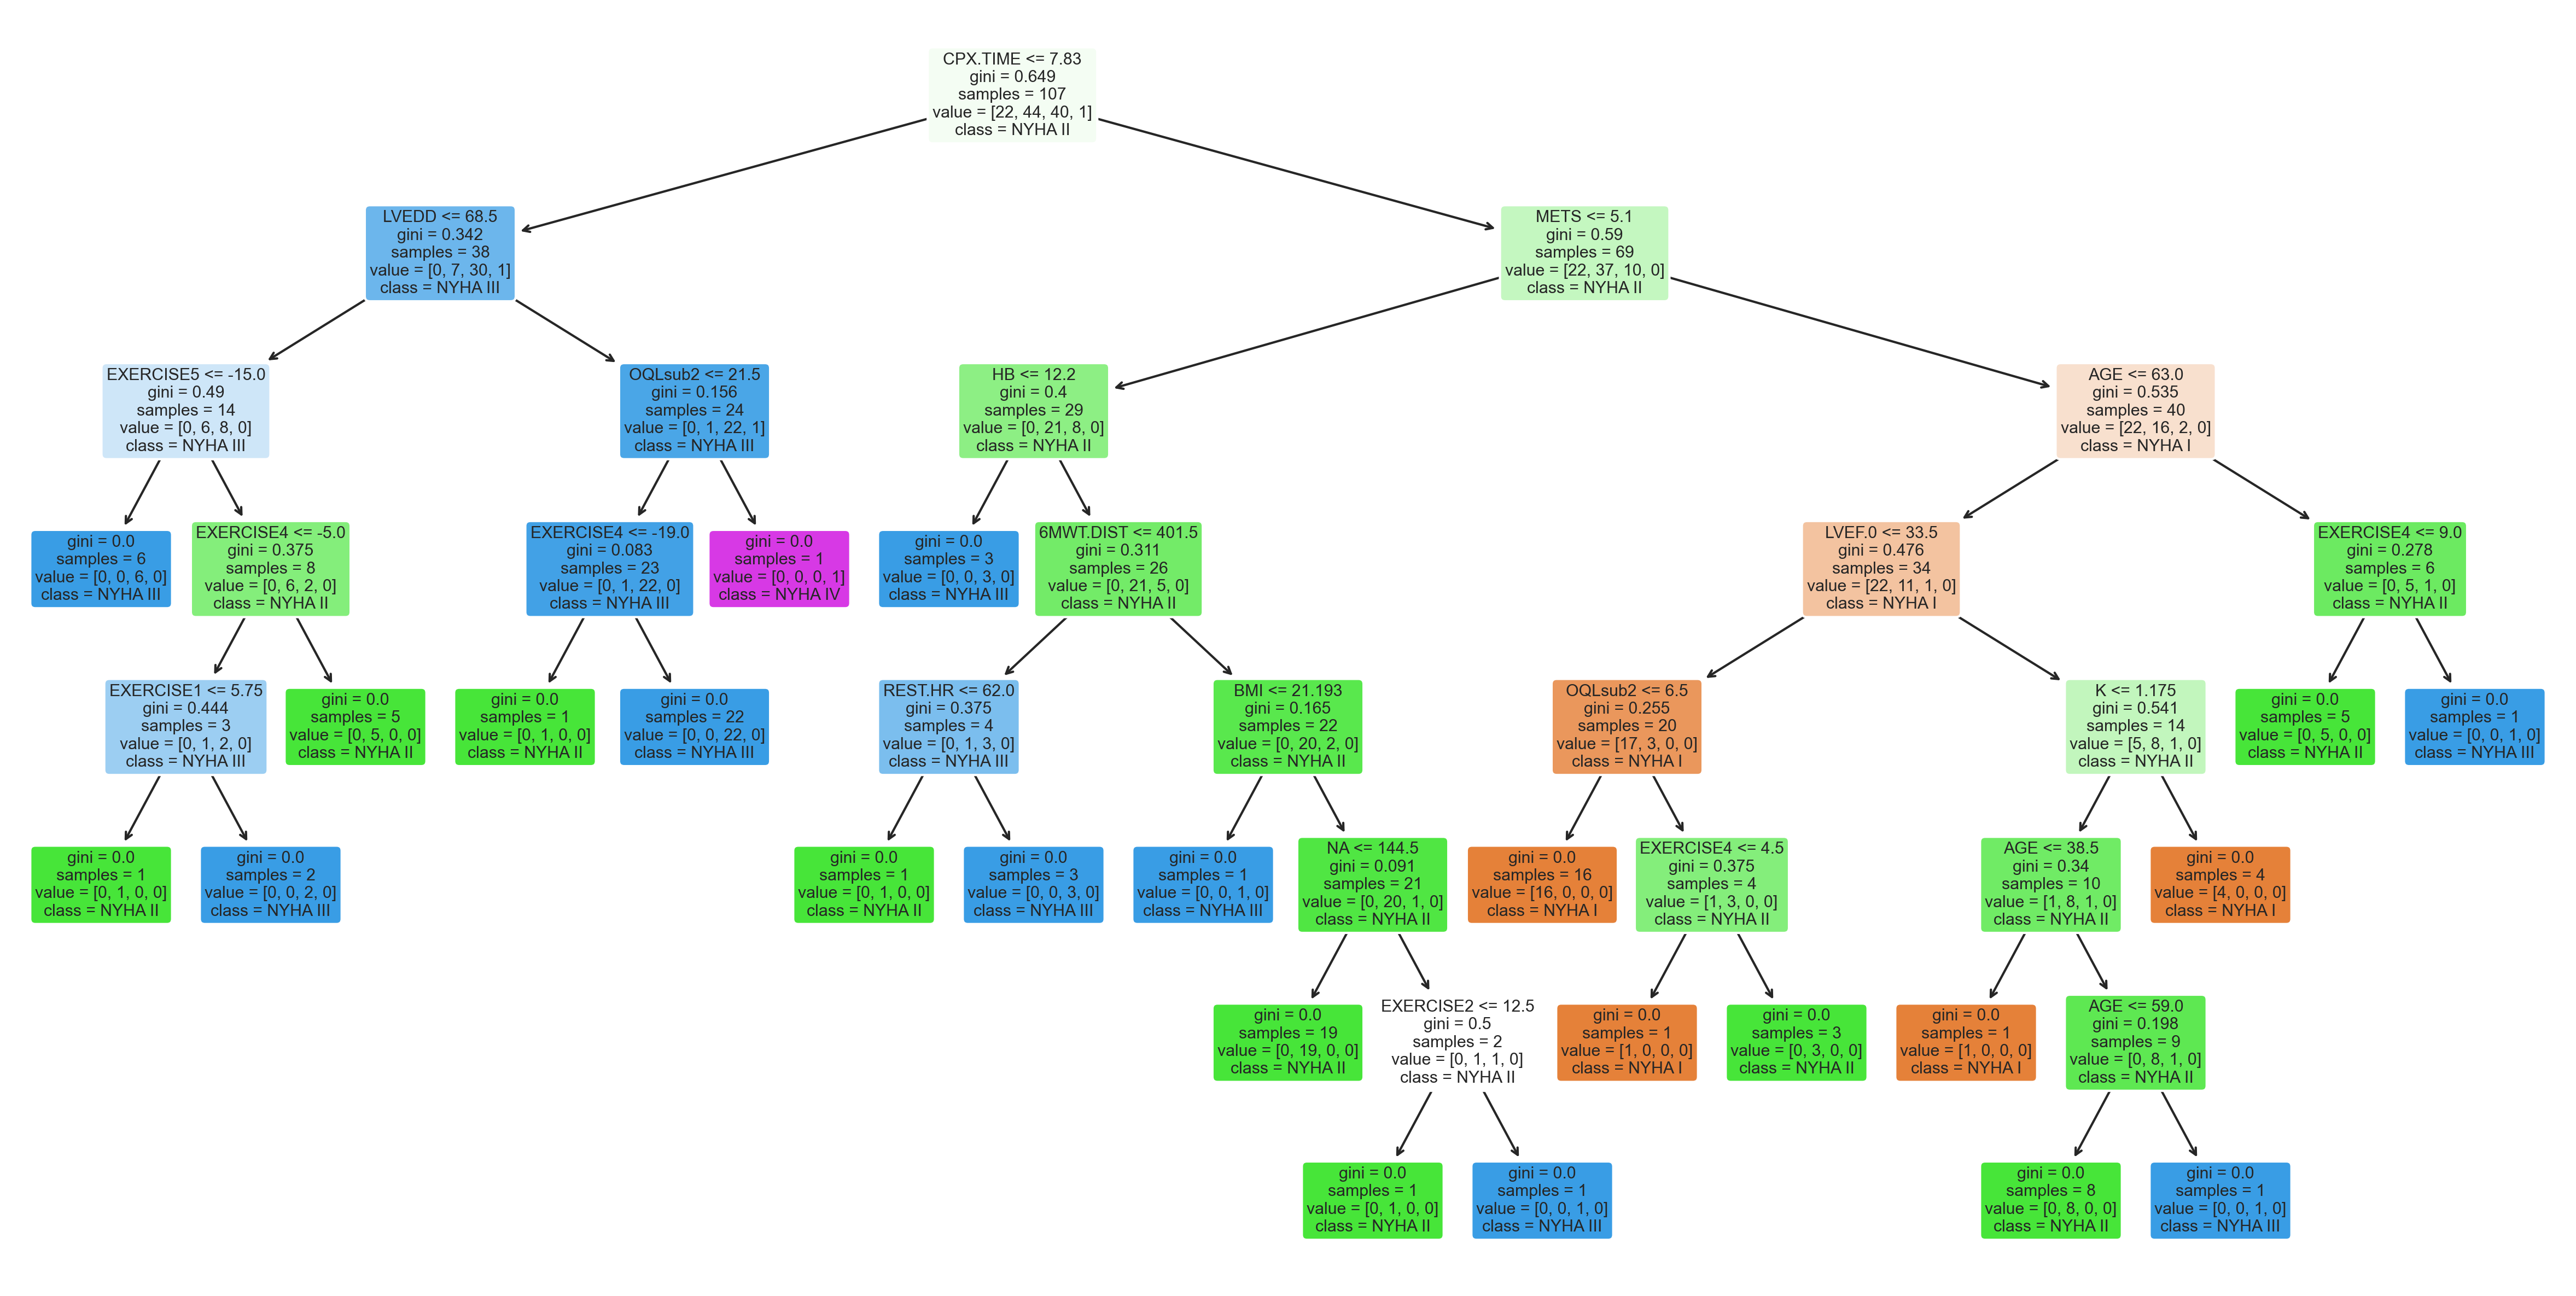

In [89]:
plt.figure(figsize=(20, 10), dpi=300)
plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=["NYHA I", "NYHA II", "NYHA III", "NYHA IV"]);
# Save the plot with good quality
plt.savefig("plots/decision_tree.png", dpi=1000)

In [90]:
# Get column with 47 index
column = X.columns[47]
X[column]

0      14.523
1      17.267
2      15.195
3      13.450
4      16.380
        ...  
452    18.588
453    12.121
454    11.596
460     8.700
461     6.605
Name: CPX.TIME, Length: 154, dtype: float64

In [91]:
def report(model, X_train, X_test, y_train, y_test):
    """
    Function to print classification report and confusion matrix for the model
    :param model: model to evaluate
    :param X_train: training data
    :param X_test: testing data
    :param y_train: training labels
    :param y_test: testing labels
    :return: None
    """
    preds = model.predict(X_test)
    print(classification_report(y_test, preds))
    confusion_matrix(y_test, preds)
    # Plot the confusion matrix
    plt.figure(figsize=(10, 6), dpi=300)
    sns.heatmap(confusion_matrix(y_test, preds), annot=True, cmap="viridis", fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    plt.title("Confusion matrix")
    name = f"max_depth_{model.max_depth}_min_samples_split_{model.min_samples_split}_min_samples_leaf_{model.min_samples_leaf}"
    # Save the plot with good quality
    plt.savefig(f"plots/confusion_matrix_{name}.png", dpi=1000)
    # Plot the tree
    plt.figure(figsize=(20, 10), dpi=300)
    plot_tree(model, feature_names=X.columns, filled=True, rounded=True, class_names=["NYHA I", "NYHA II", "NYHA III", "NYHA IV"]);
    # Save the plot with good quality
    # Set name for plot with particular model parameters
    plt.savefig(f"plots/decision_tree_{name}.png", dpi=1000)


C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.60      0.75      0.67         4
         2.0       0.76      0.54      0.63        24
         3.0       0.60      0.83      0.70        18
         4.0       0.00      0.00      0.00         1

    accuracy                           0.66        47
   macro avg       0.49      0.53      0.50        47
weighted avg       0.67      0.66      0.65        47



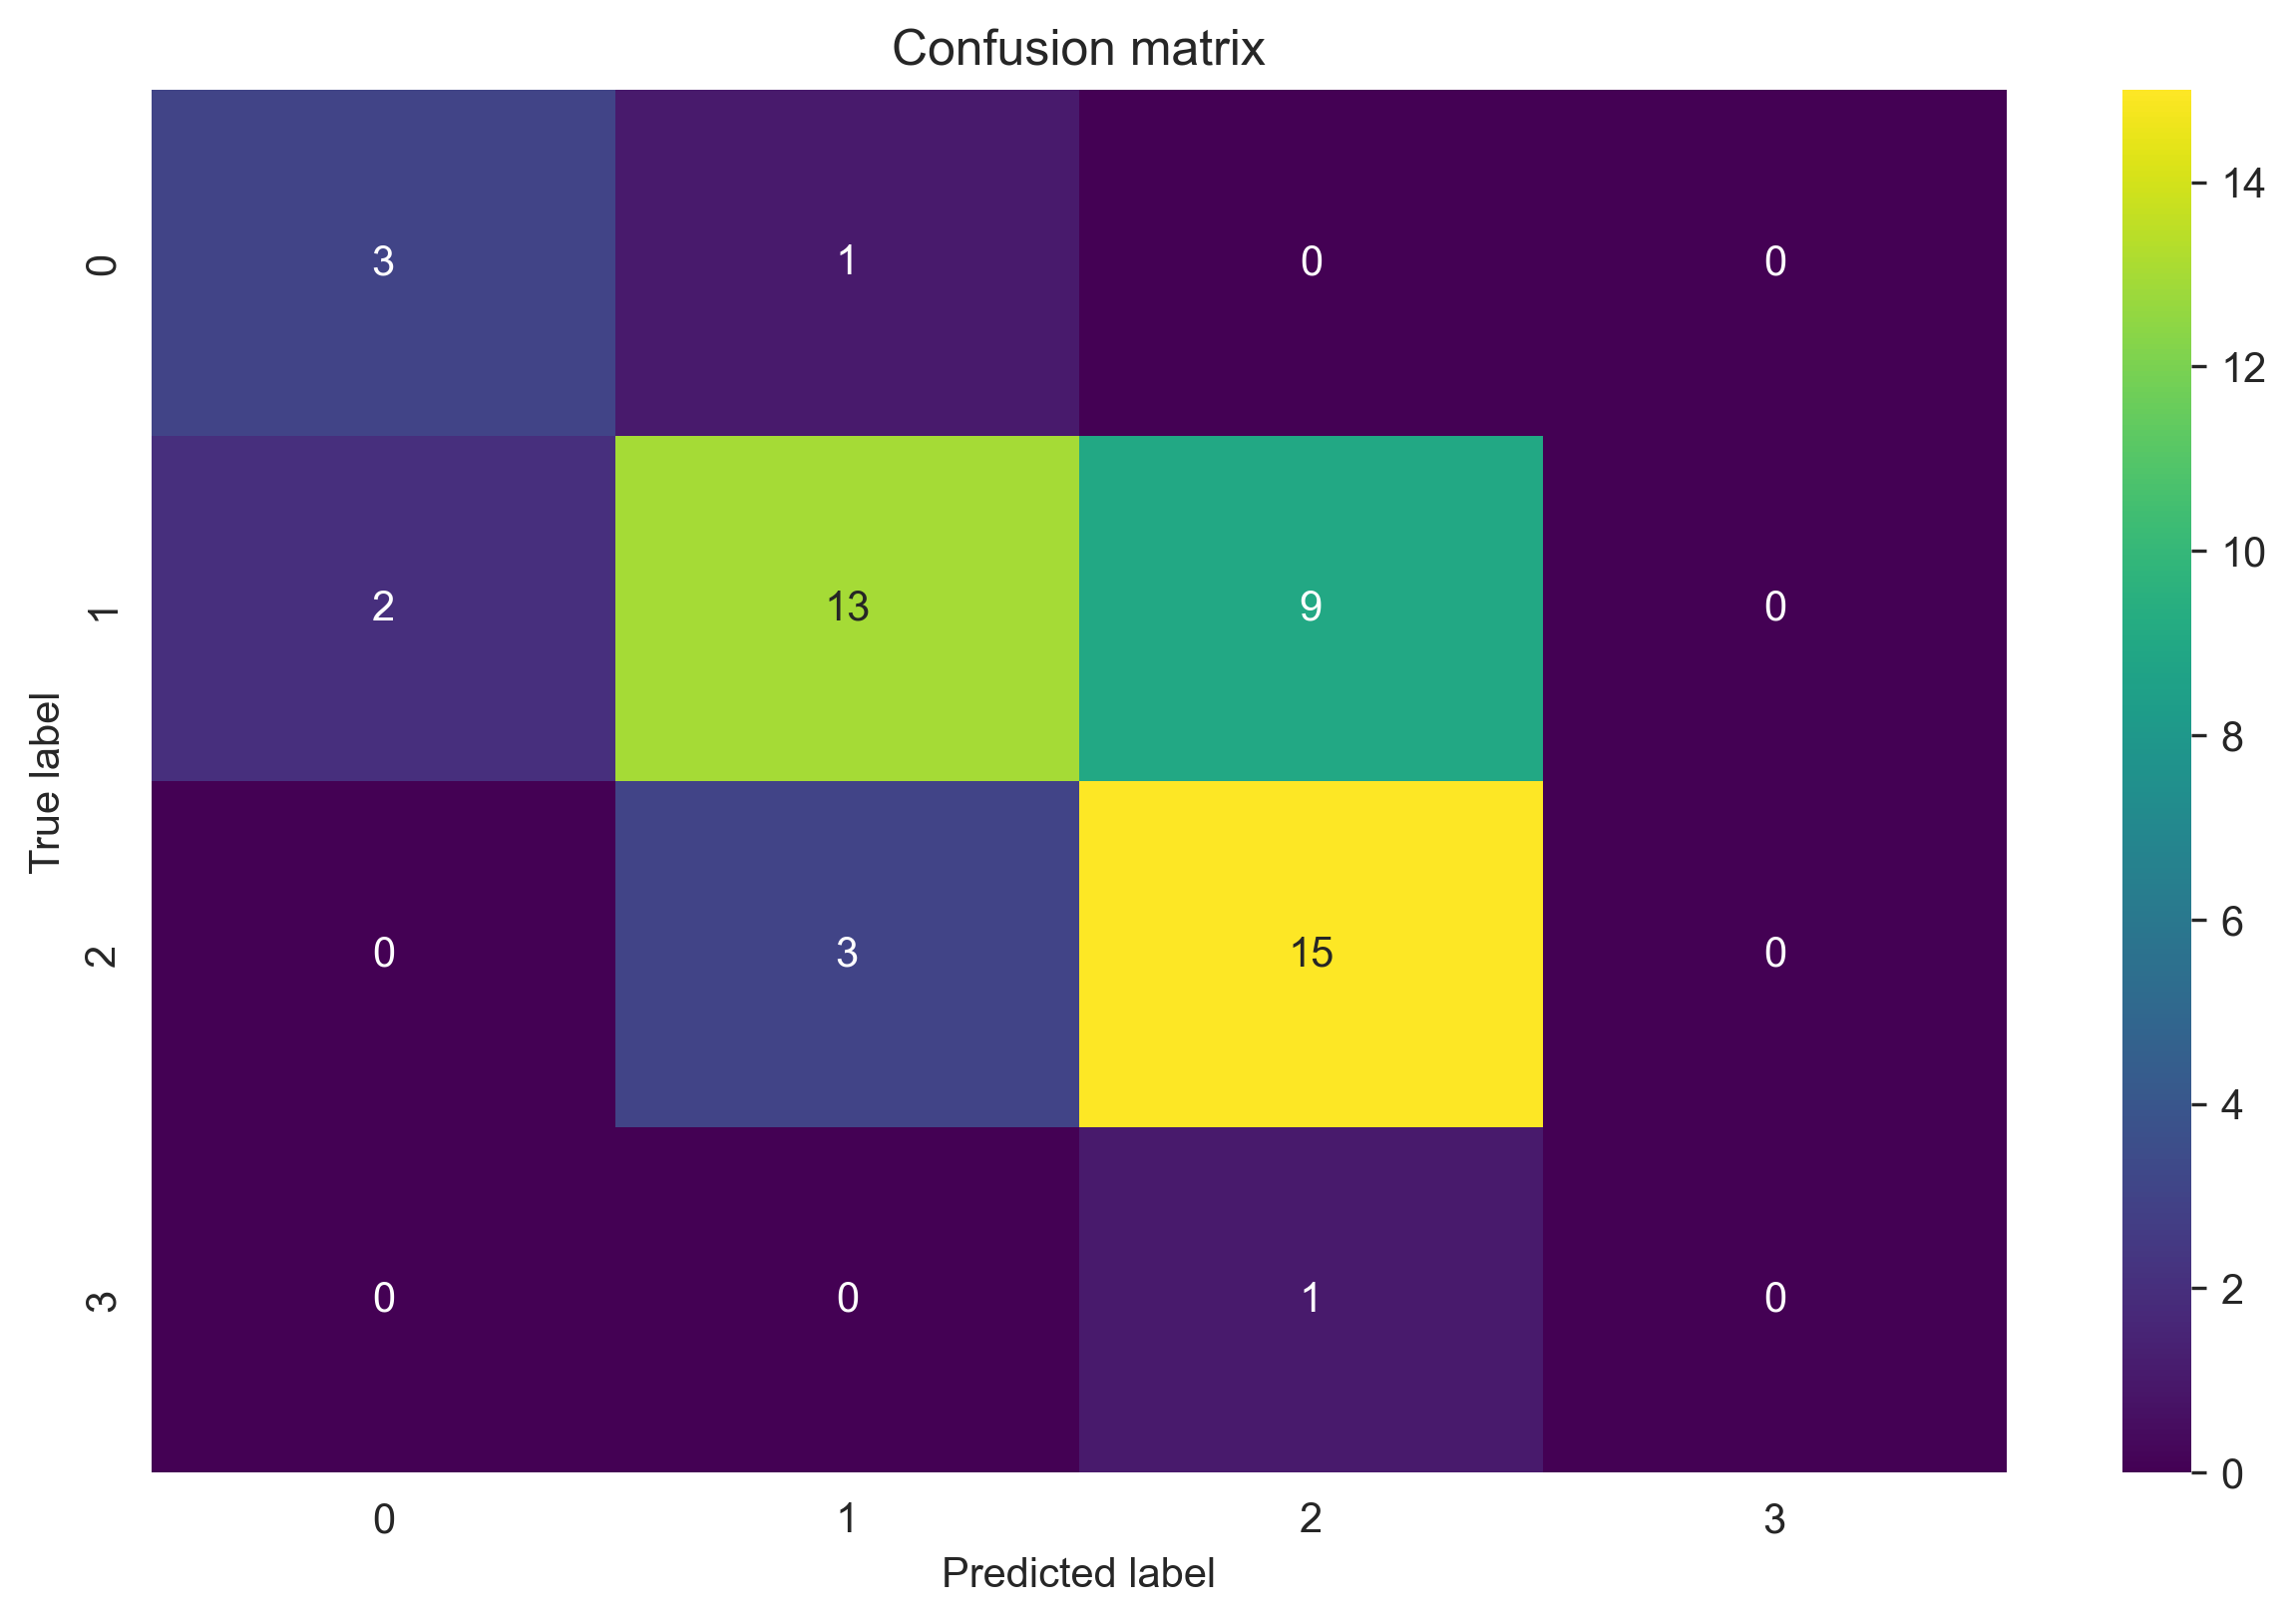

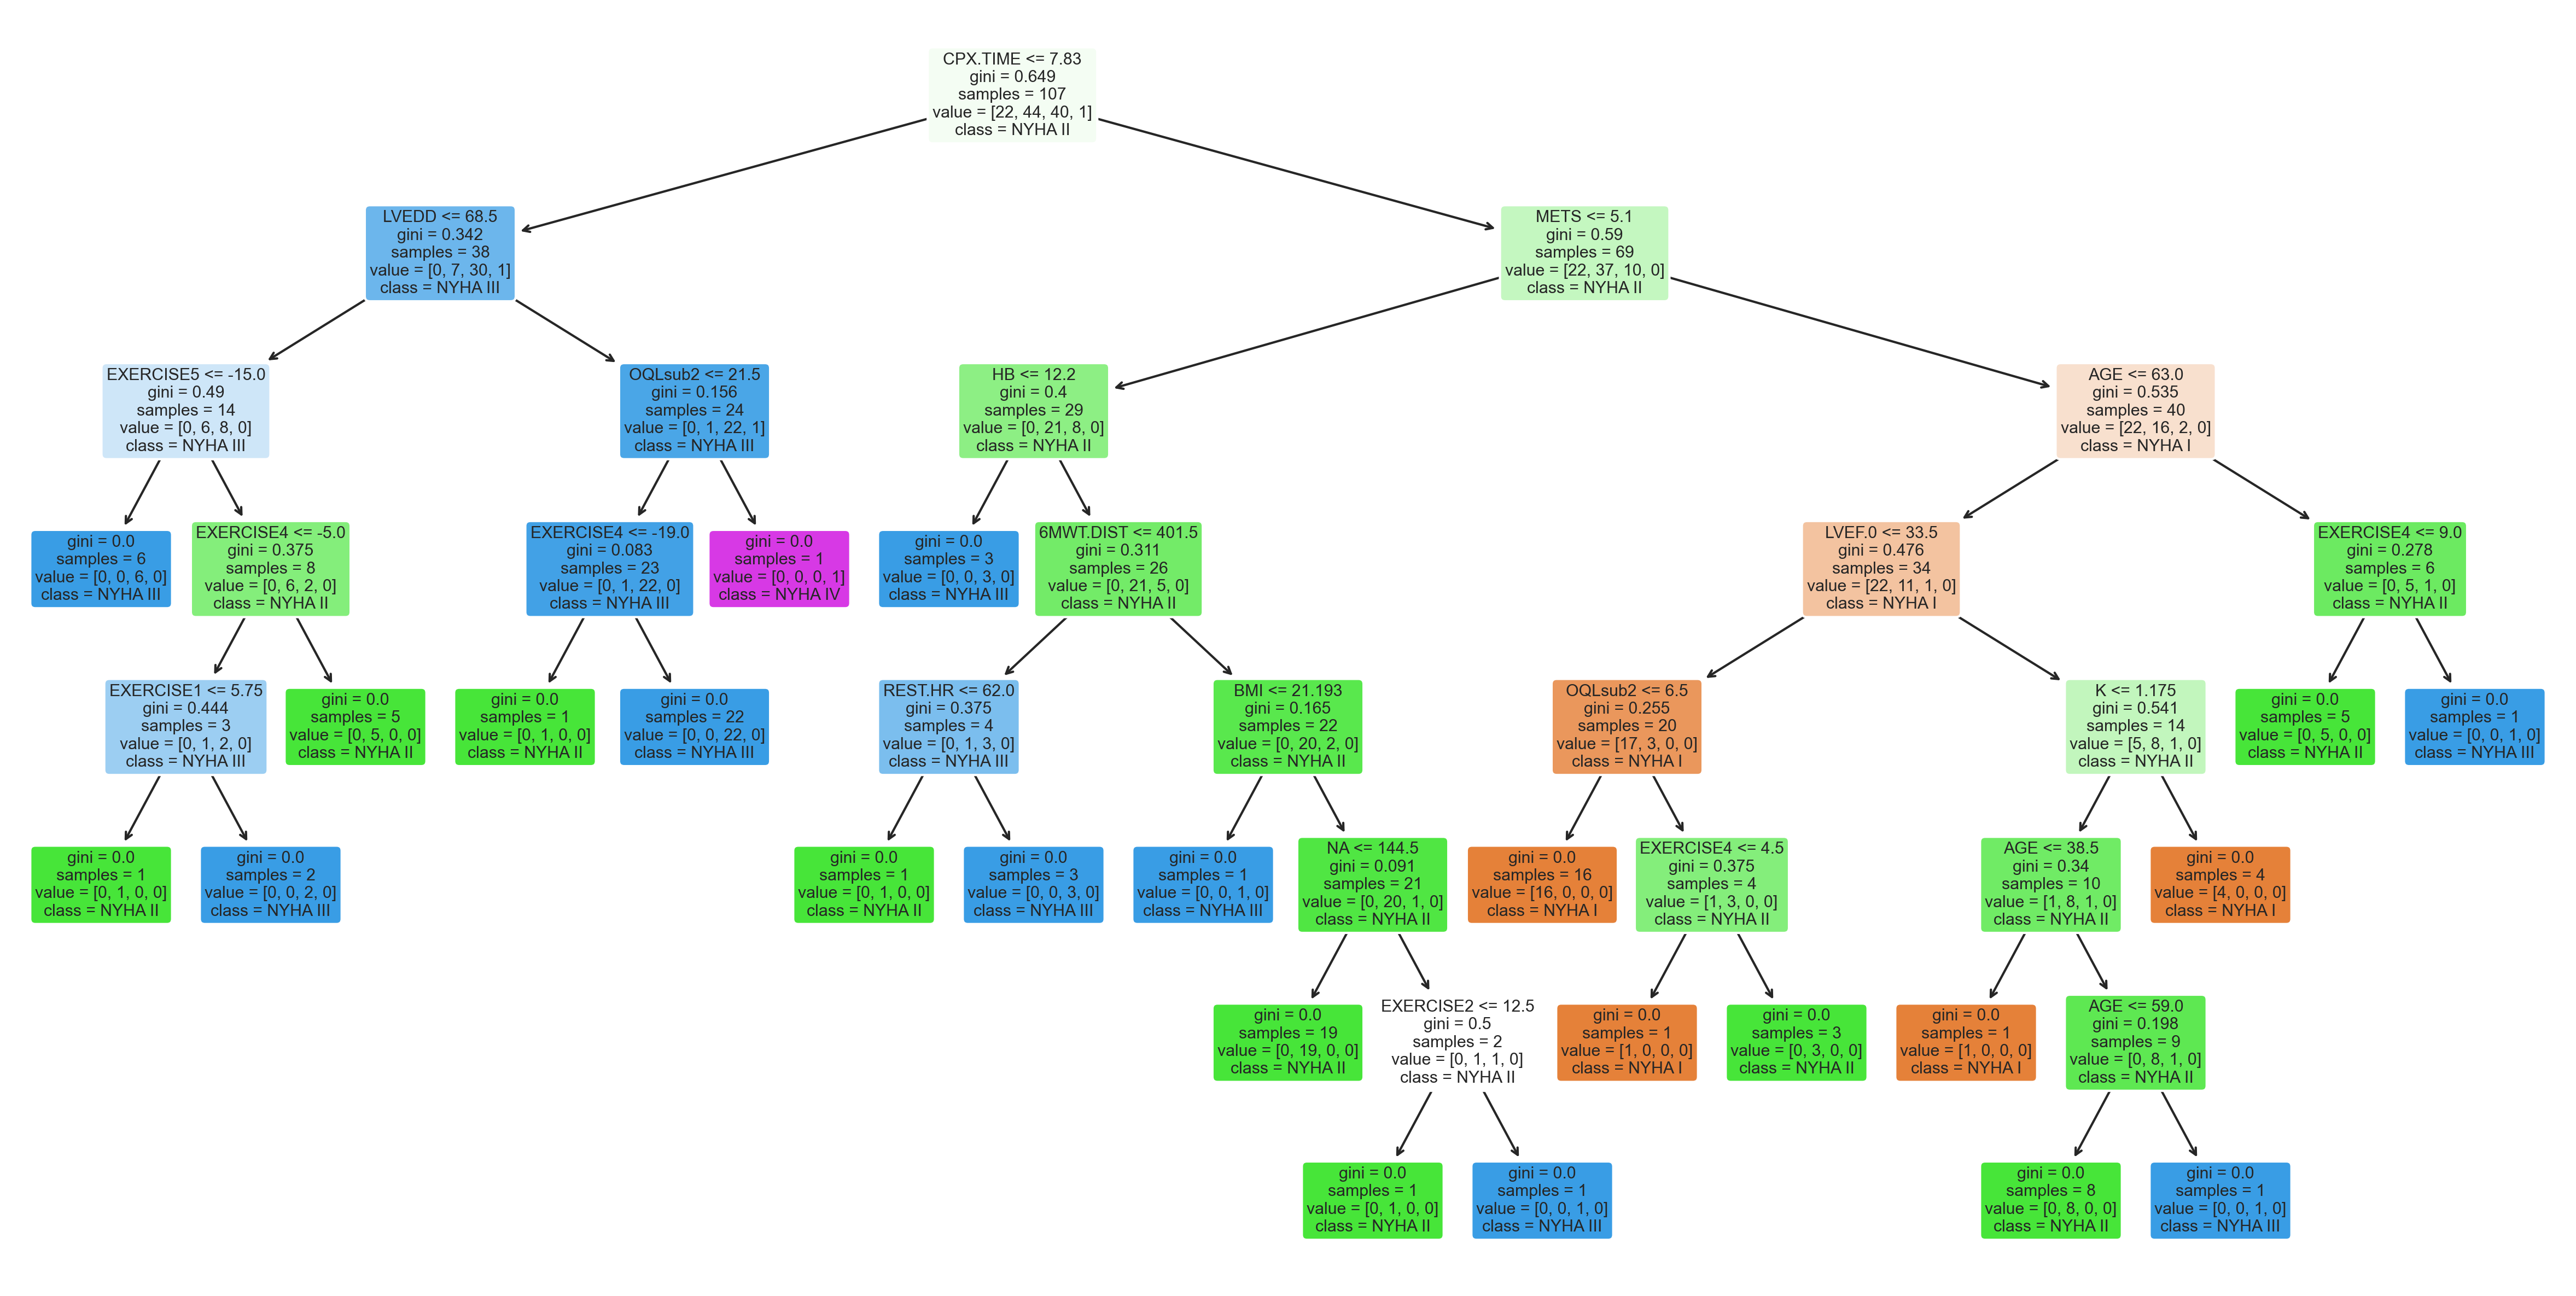

In [92]:
report(model, X_train, X_test, y_train, y_test)

In [93]:
# Setting a max depth for the tree
pruned_model = DecisionTreeClassifier(max_depth=3)

In [94]:
pruned_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.43      0.75      0.55         4
         2.0       0.61      0.58      0.60        24
         3.0       0.59      0.56      0.57        18
         4.0       0.00      0.00      0.00         1

    accuracy                           0.57        47
   macro avg       0.41      0.47      0.43        47
weighted avg       0.57      0.57      0.57        47



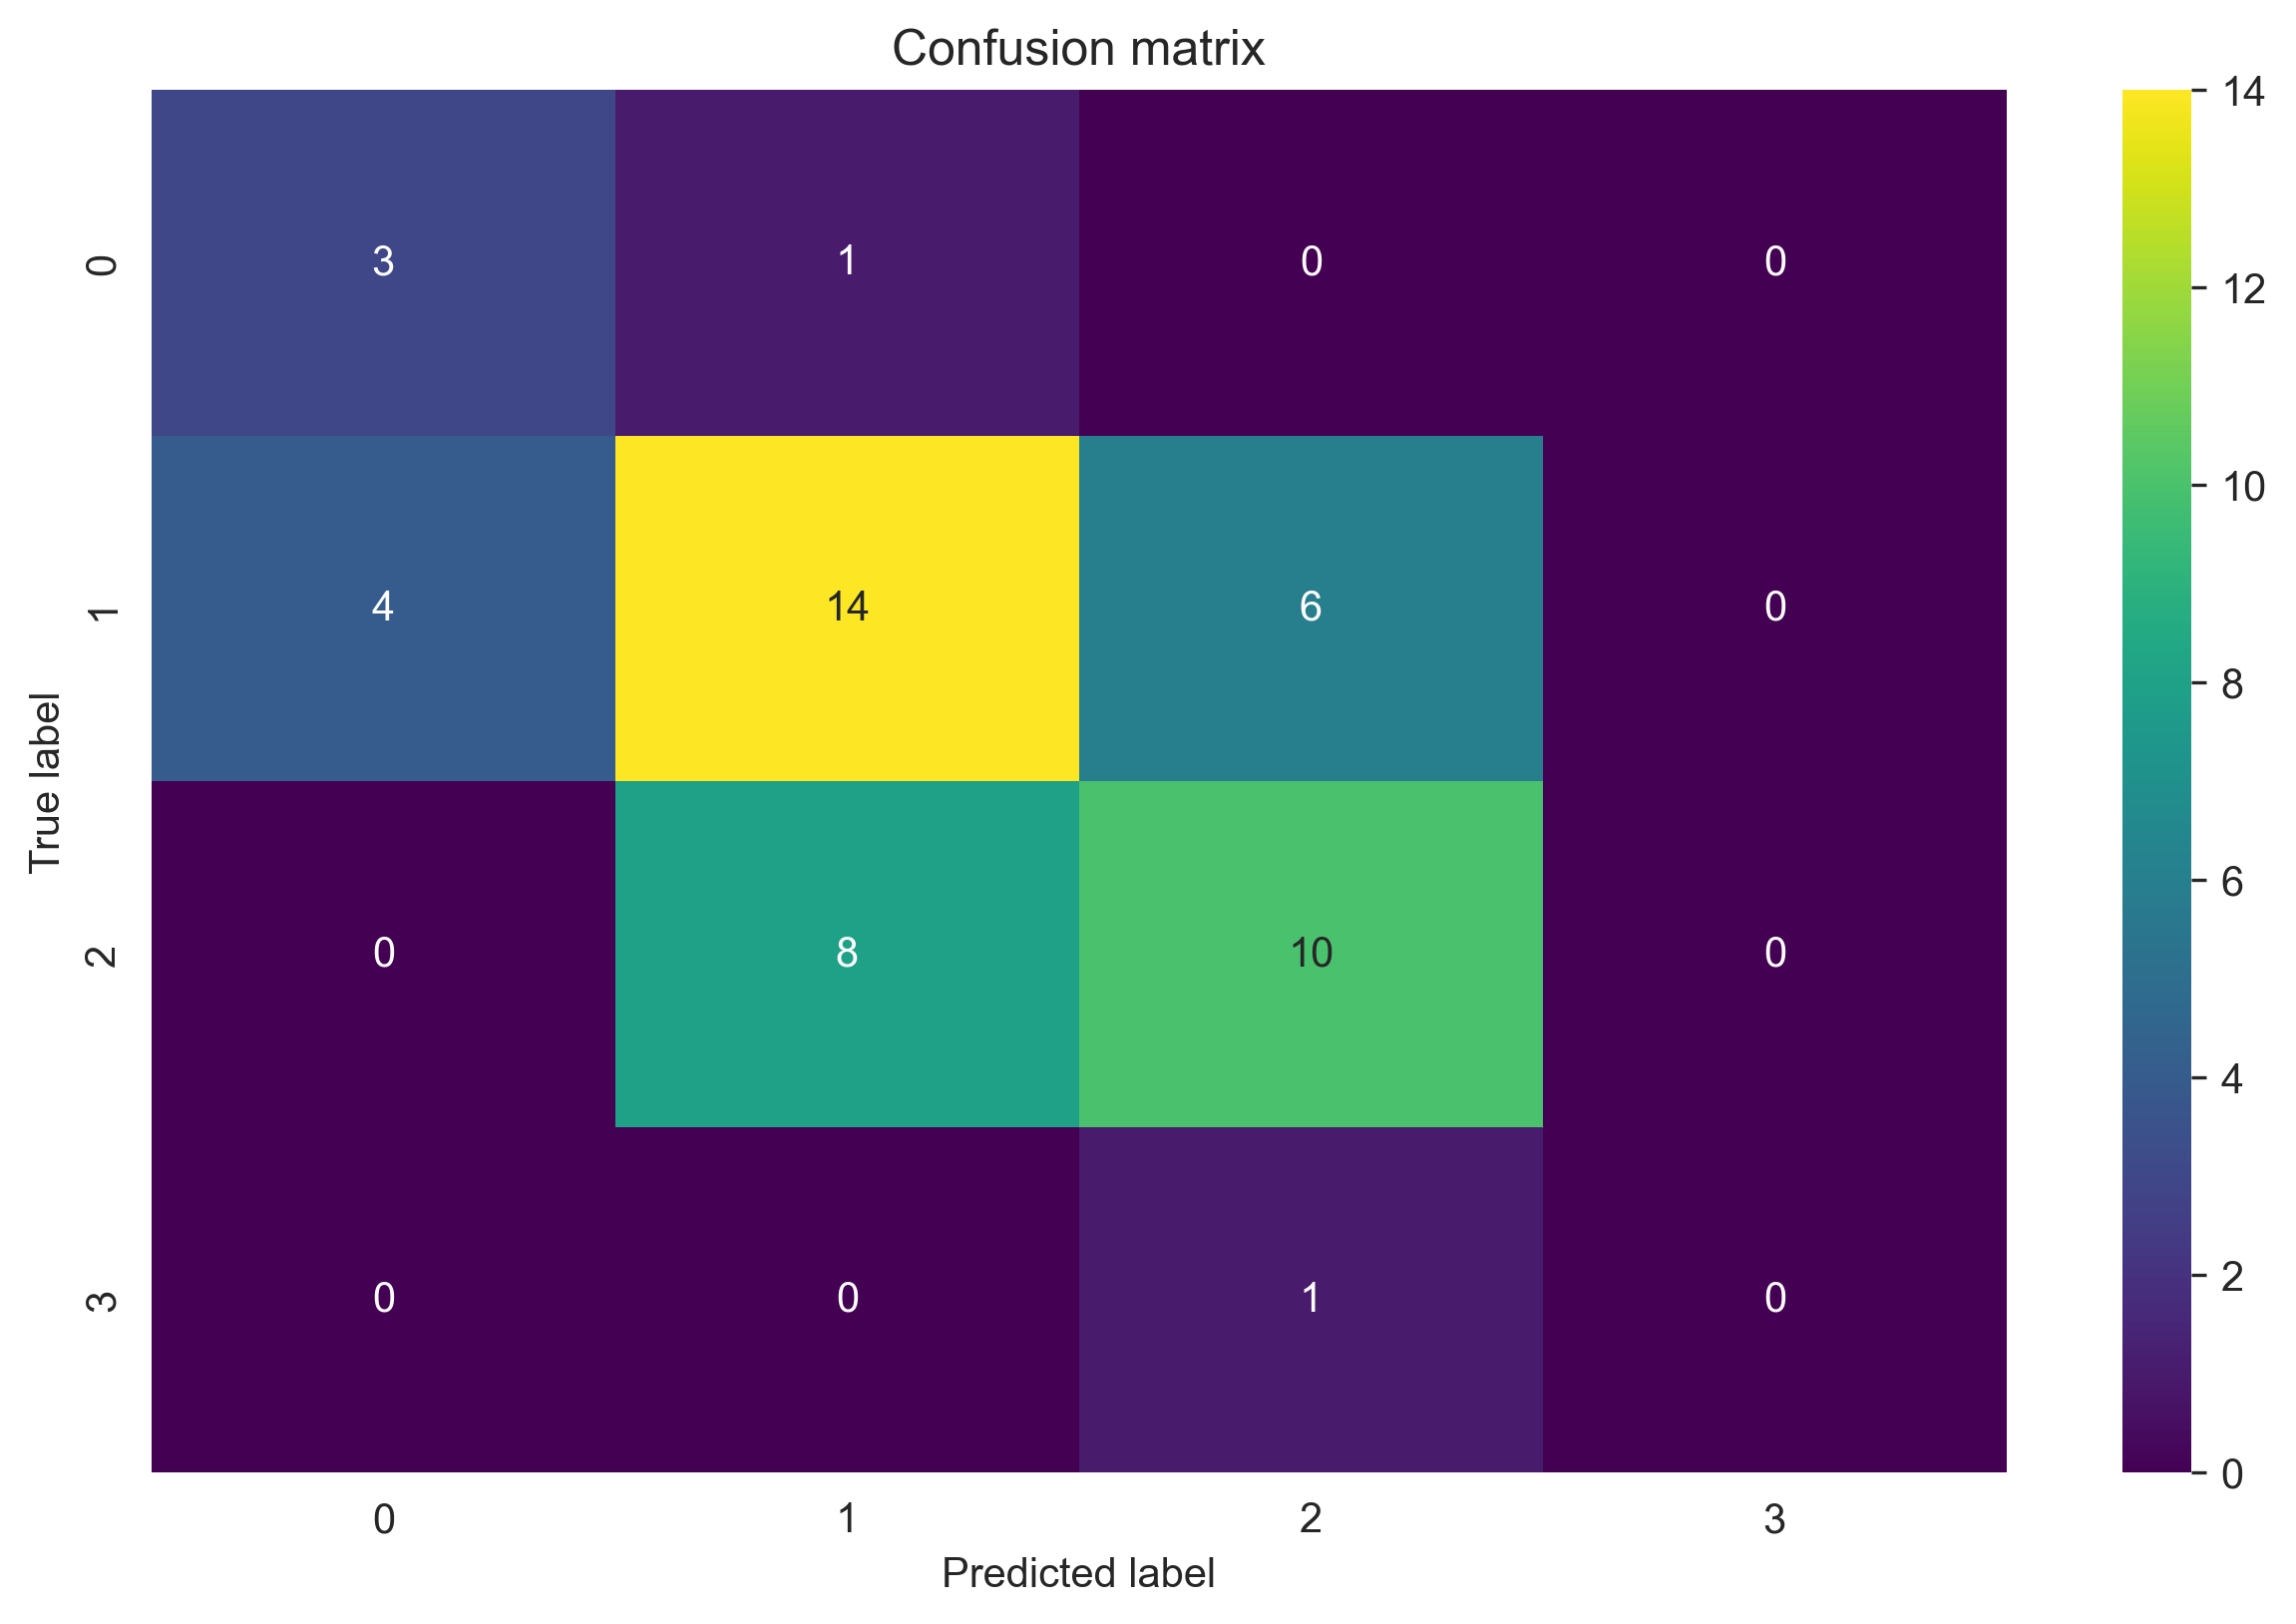

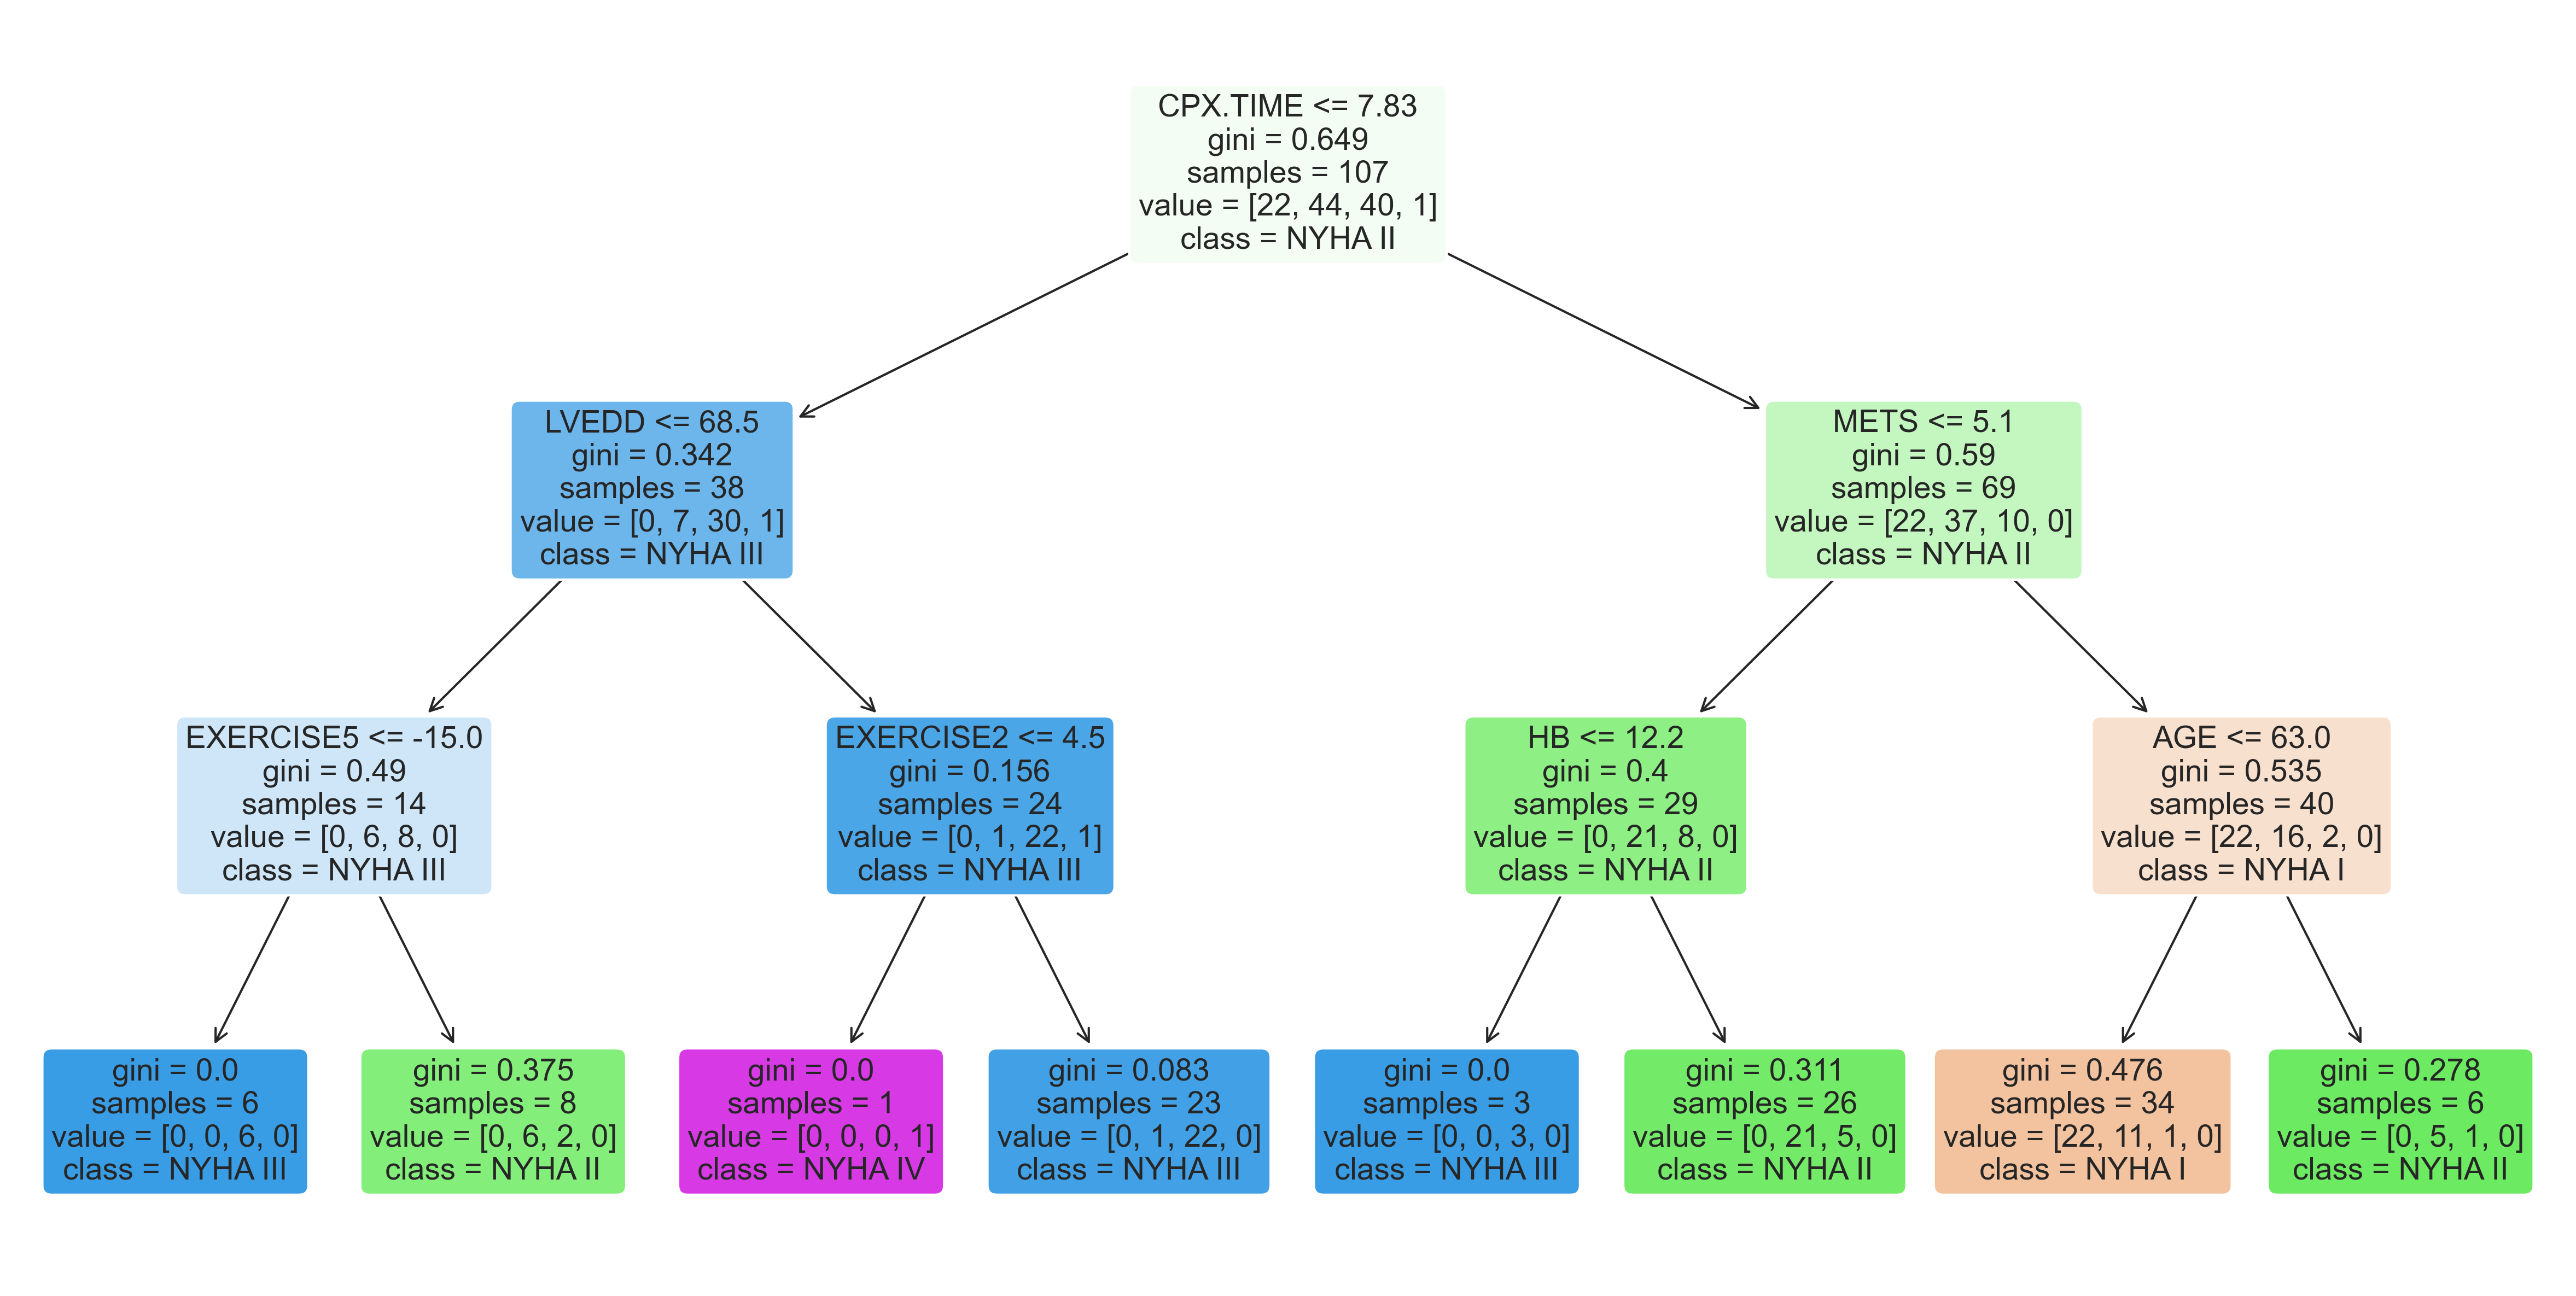

In [95]:
report(pruned_model, X_train, X_test, y_train, y_test)

In [96]:
# Maximum number of leaf nodes
pruned_model = DecisionTreeClassifier(max_leaf_nodes=4)

In [97]:
pruned_model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=4)

C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         1.0       0.43      0.75      0.55         4
         2.0       0.58      0.58      0.58        24
         3.0       0.56      0.50      0.53        18
         4.0       0.00      0.00      0.00         1

    accuracy                           0.55        47
   macro avg       0.39      0.46      0.41        47
weighted avg       0.55      0.55      0.55        47



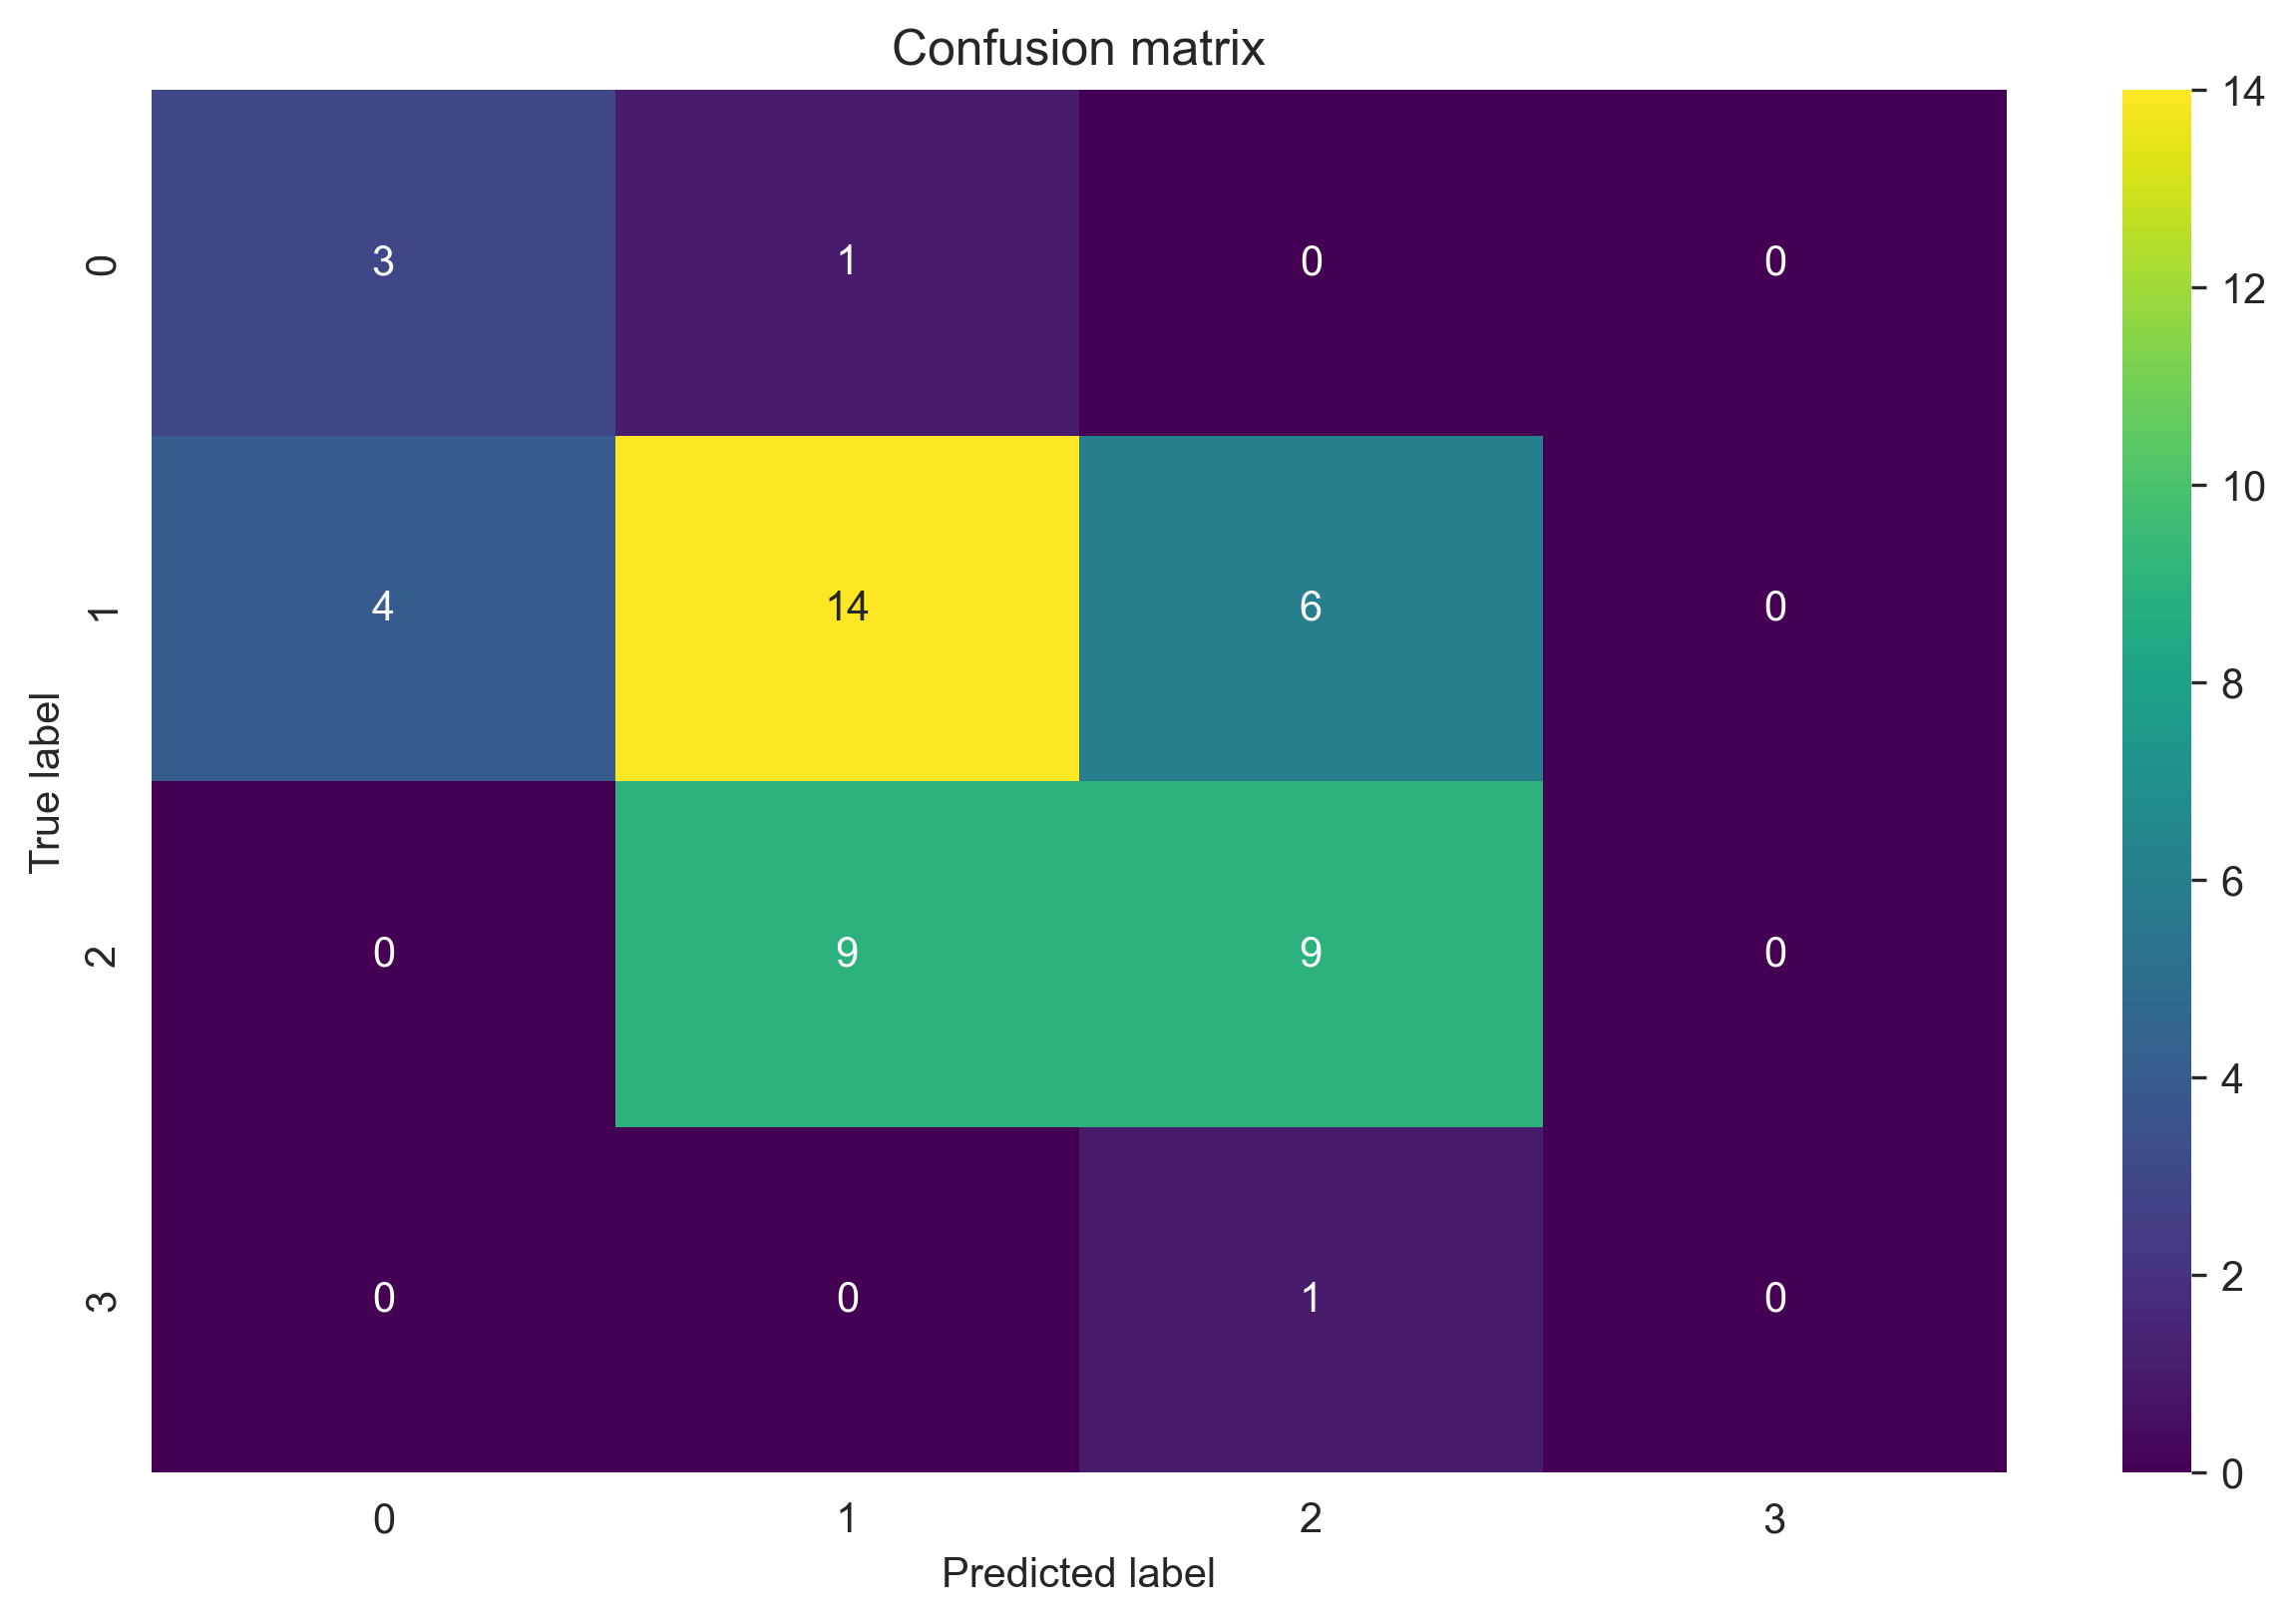

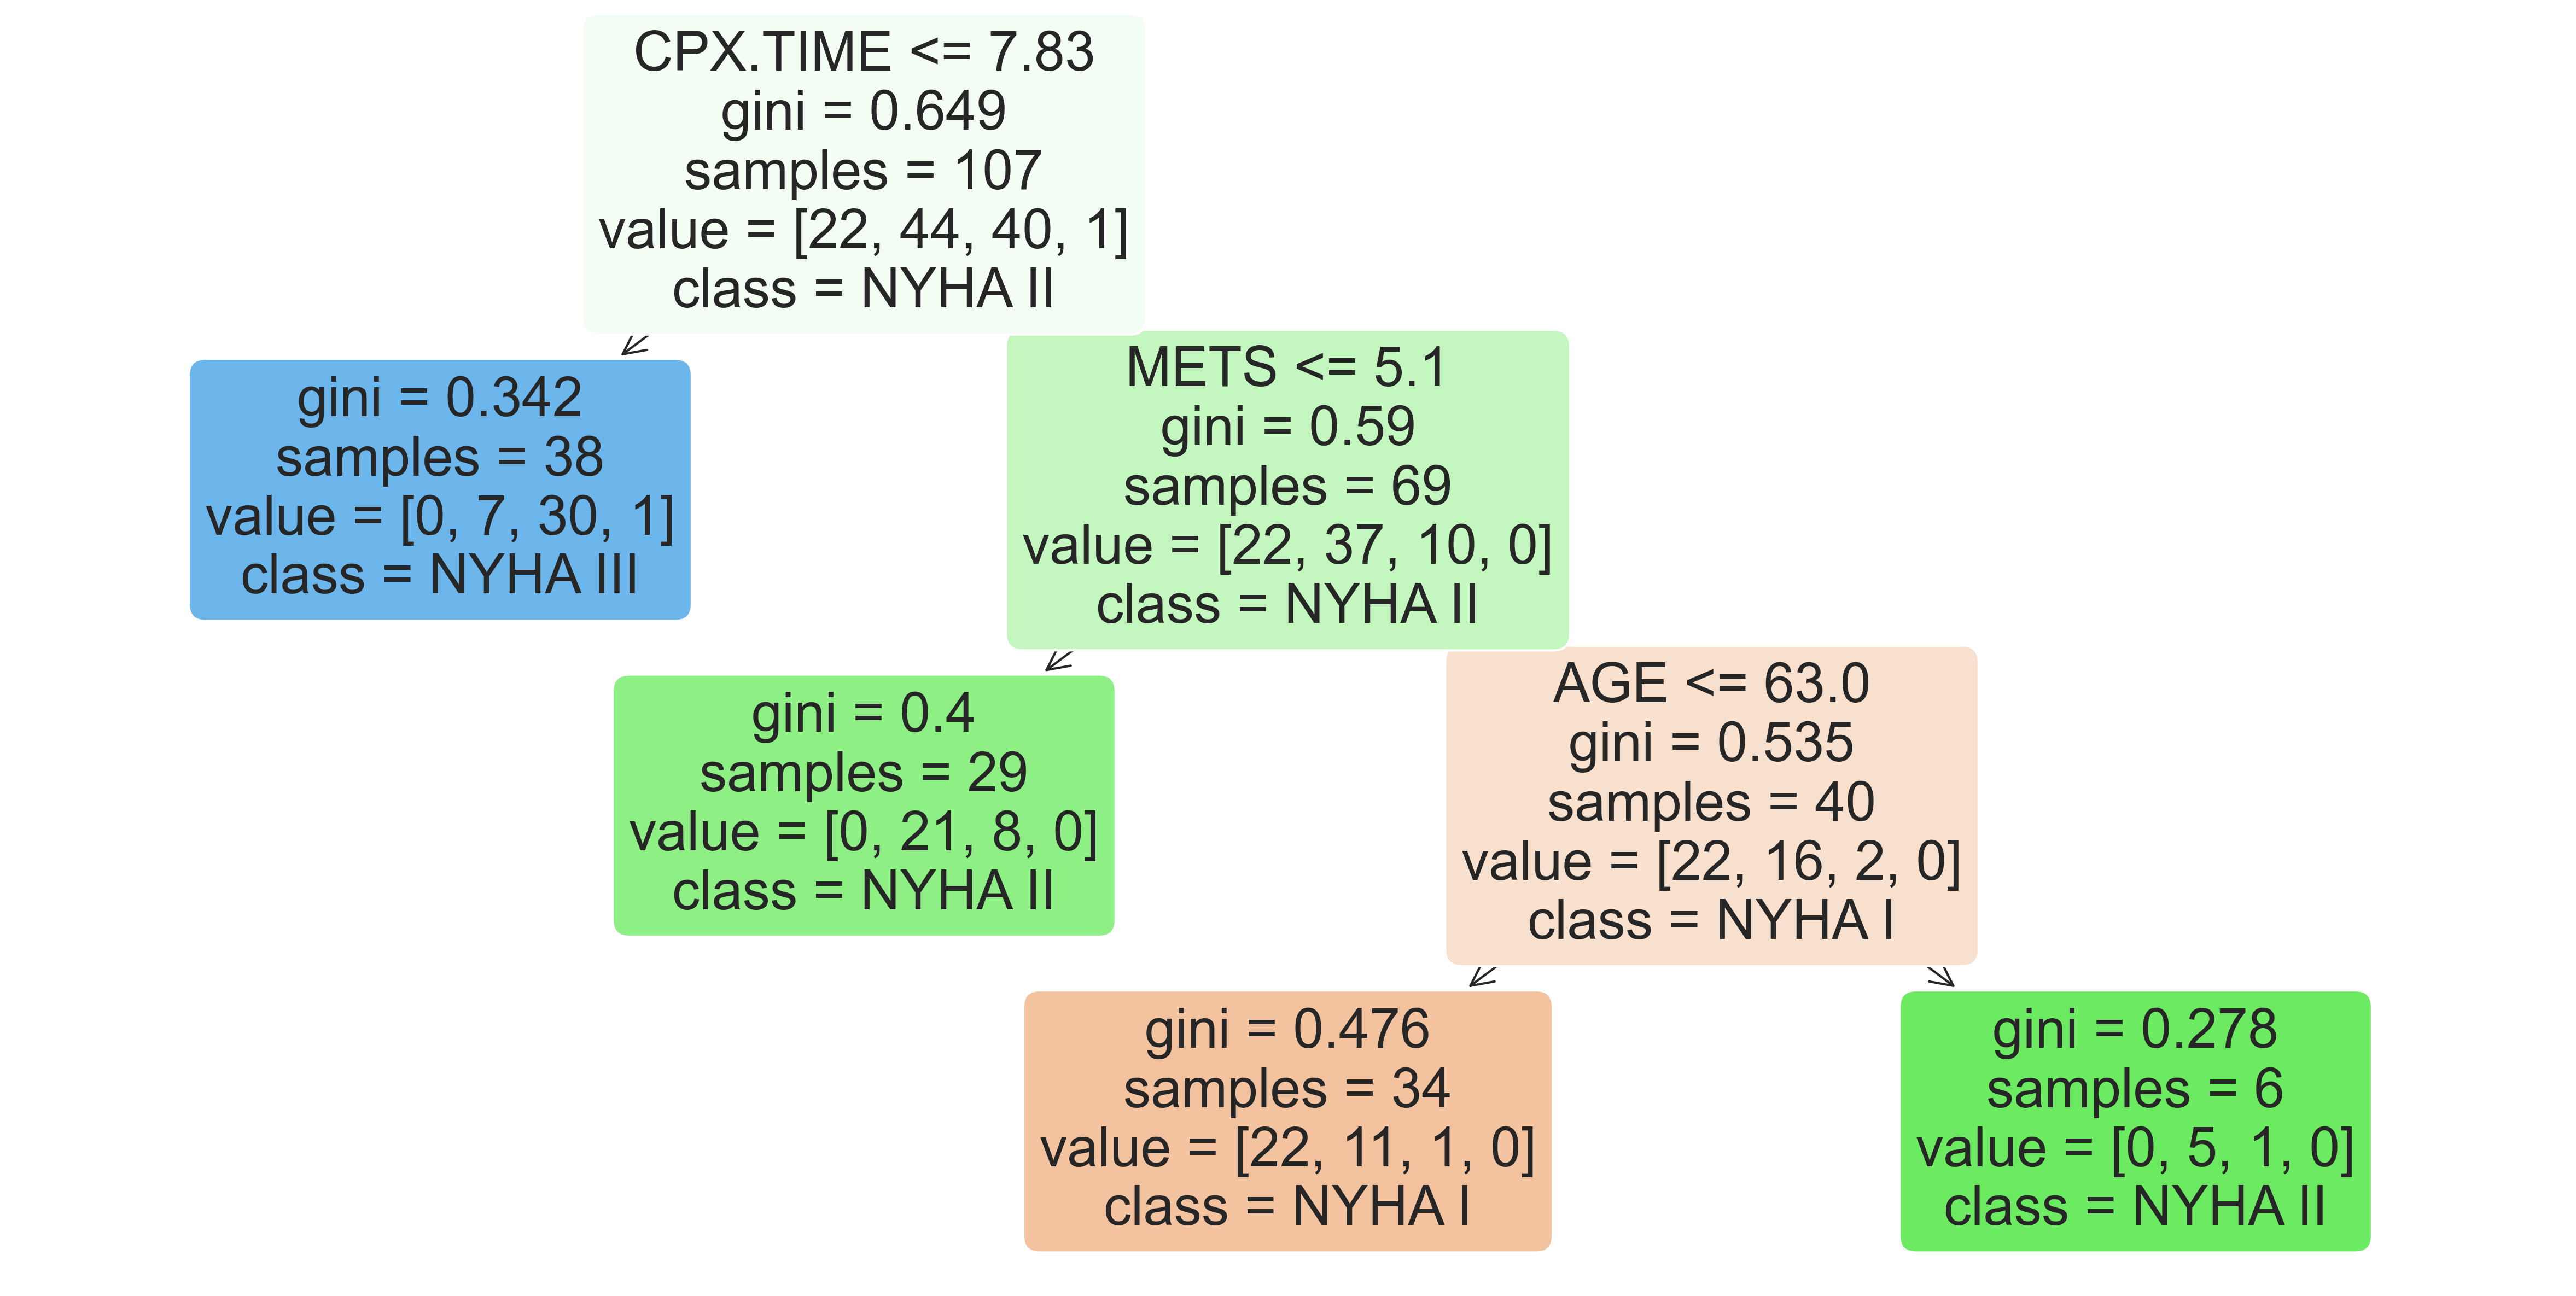

In [98]:
report(pruned_model, X_train, X_test, y_train, y_test)

In [99]:
entropy_tree = DecisionTreeClassifier(criterion="entropy", class_weight="balanced")

In [100]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy')

              precision    recall  f1-score   support

         1.0       0.67      0.50      0.57         4
         2.0       0.57      0.54      0.55        24
         3.0       0.45      0.50      0.47        18
         4.0       0.00      0.00      0.00         1

    accuracy                           0.51        47
   macro avg       0.42      0.39      0.40        47
weighted avg       0.52      0.51      0.51        47



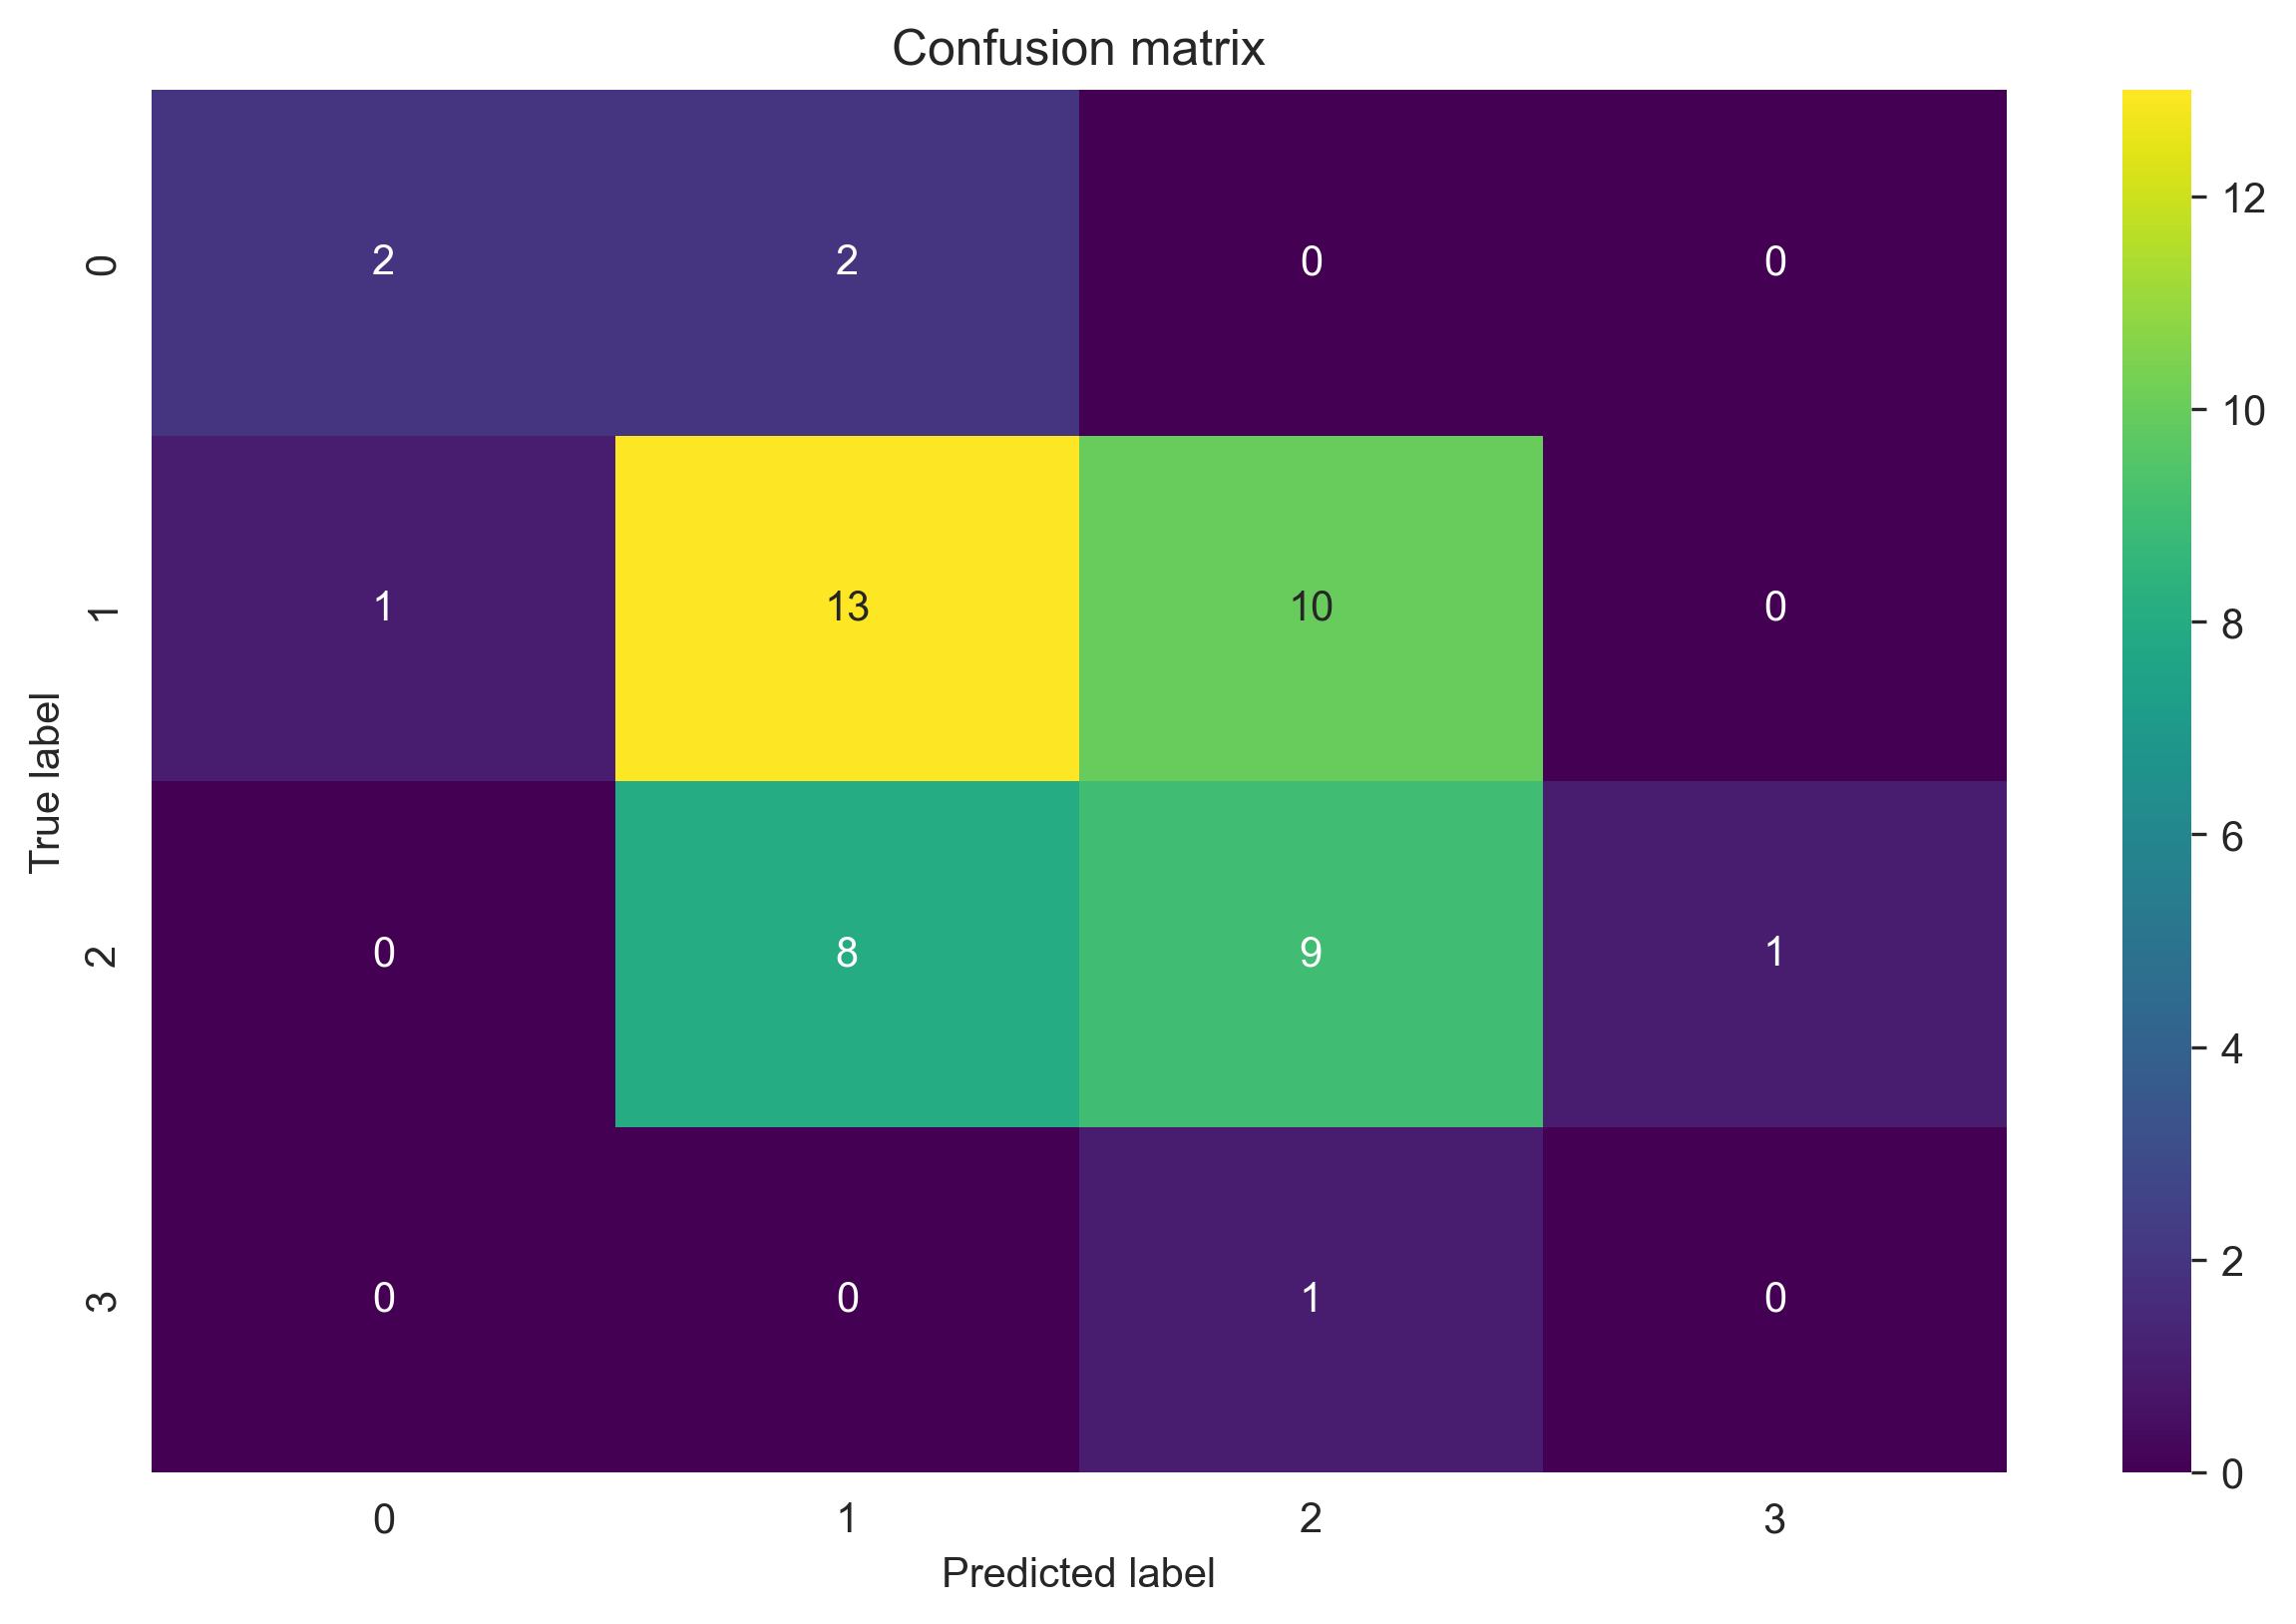

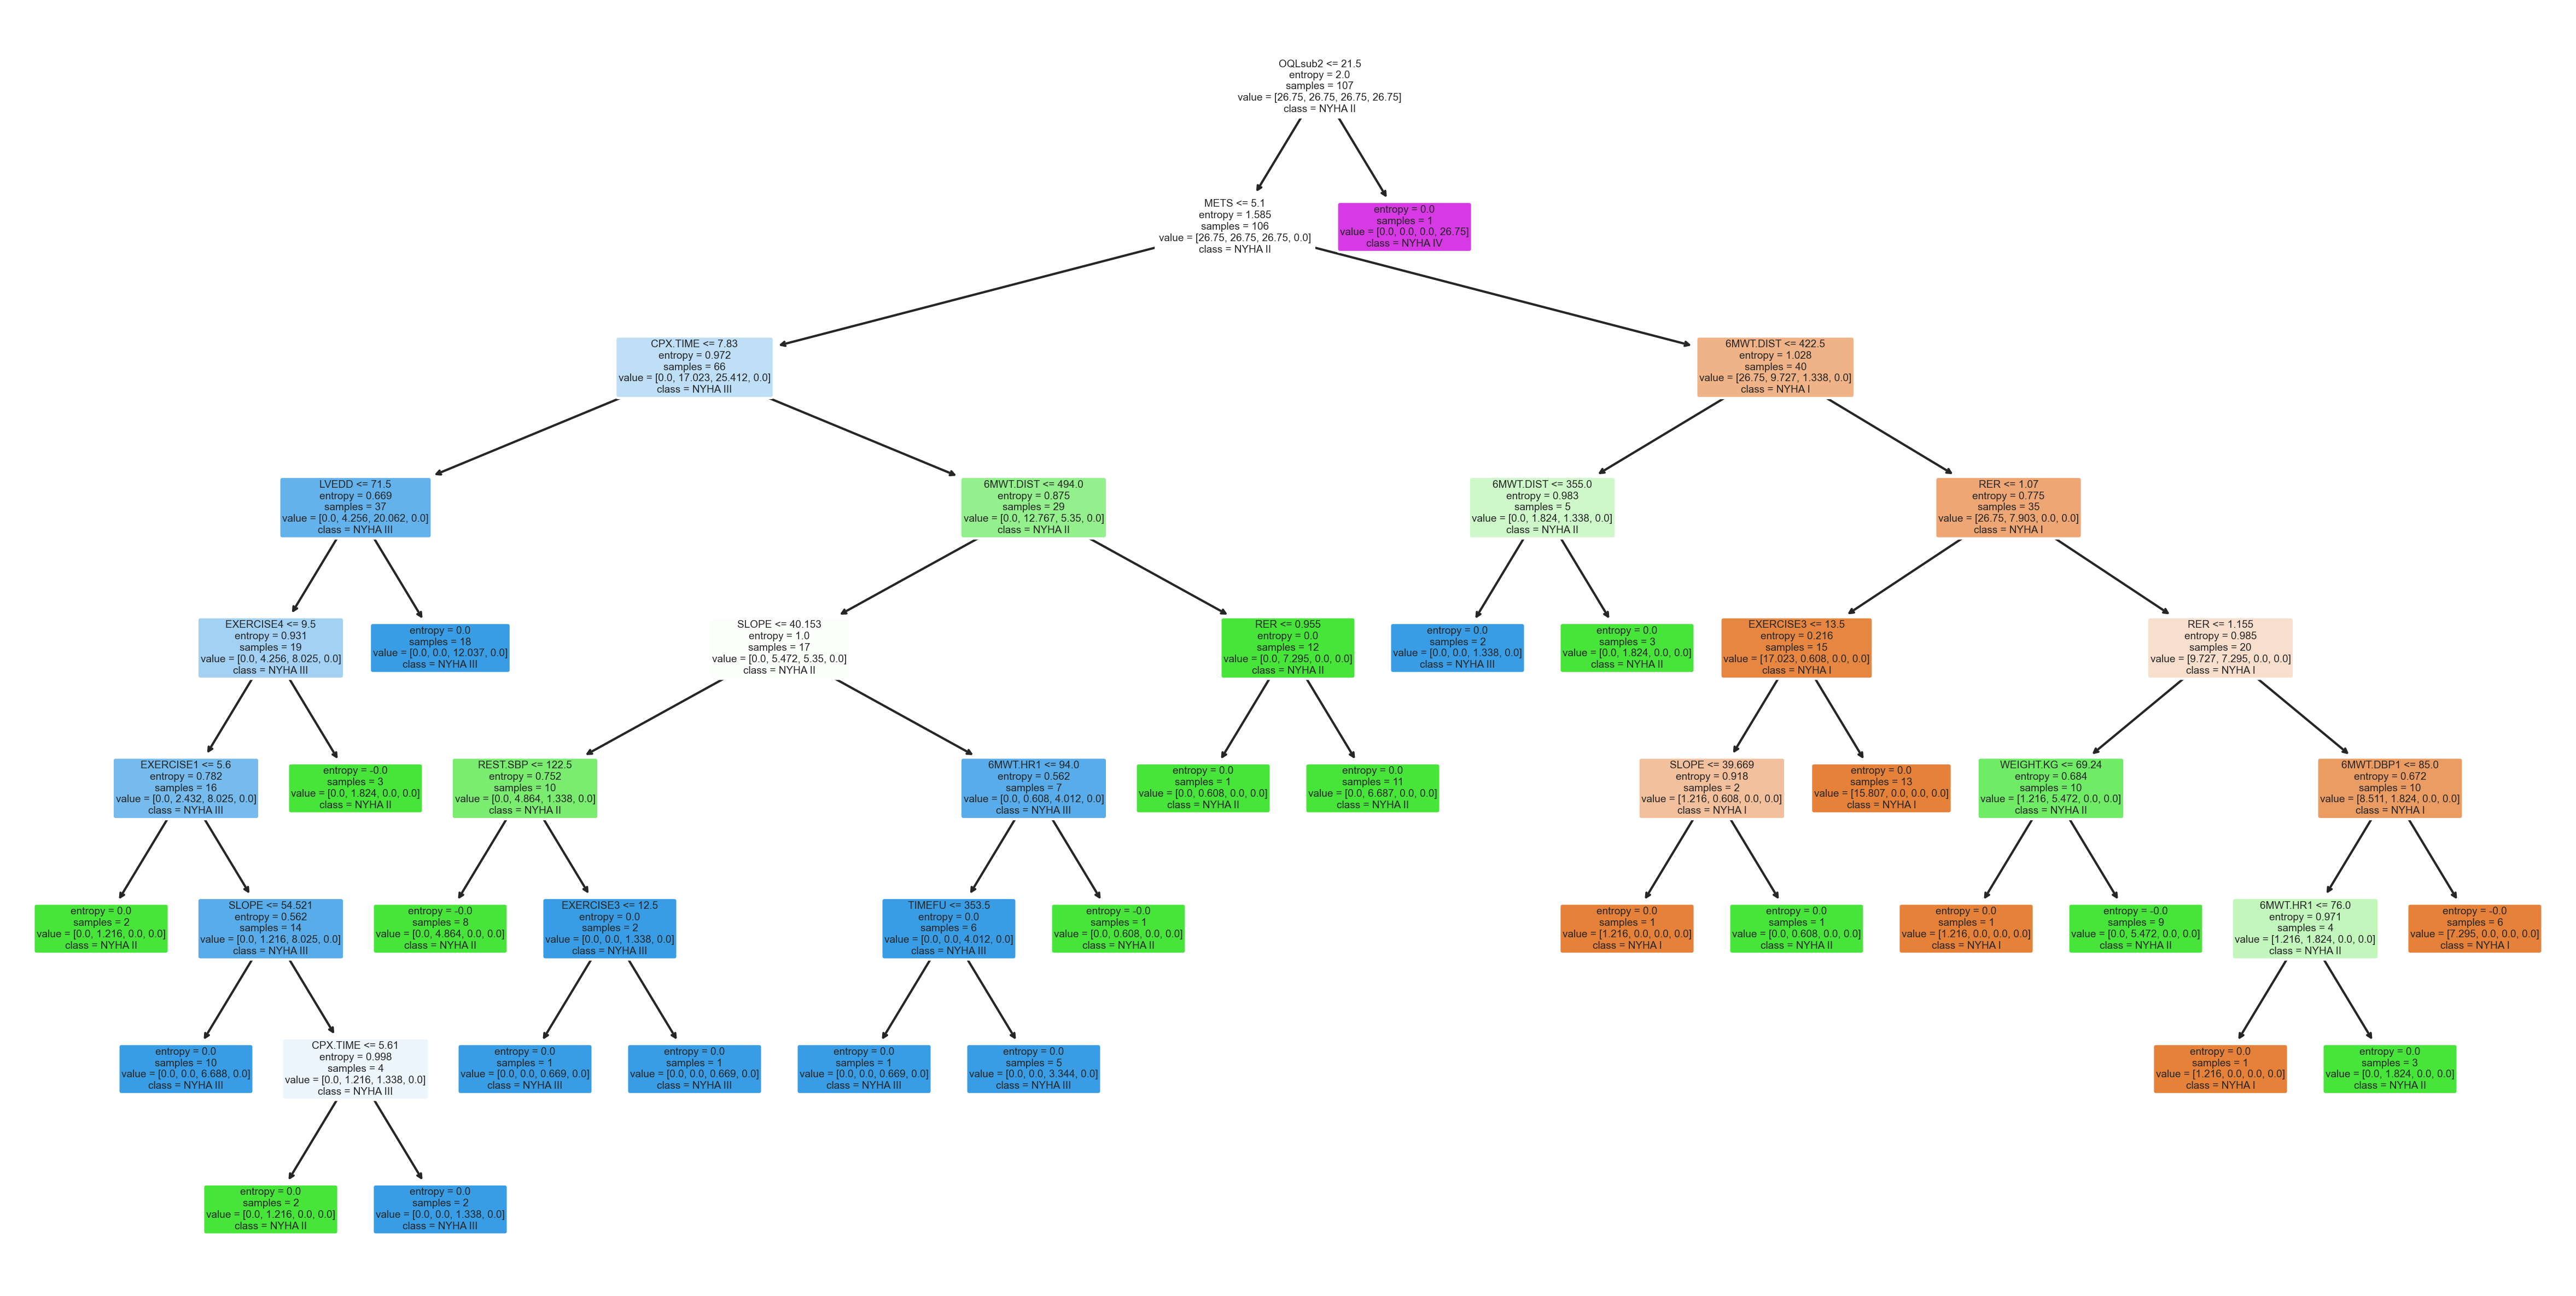

In [101]:
report(entropy_tree, X_train, X_test, y_train, y_test)

In [102]:
# Test with cross validation with 10 folds stratified
from sklearn.model_selection import cross_val_score

In [103]:
result = cross_val_score(entropy_tree, X, y, cv=10, scoring="accuracy")
# Print result
print(result)
print(f"Mean accuracy: {result.mean():.2f}")

[0.4375     0.5625     0.5        0.25       0.46666667 0.66666667
 0.53333333 0.4        0.6        0.6       ]
Mean accuracy: 0.50


C:\Users\Krystian\work\task\HeartBit\venv\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
